In [110]:
import pandas as pd
import numpy as np
from numpy import random

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import seaborn as sns
from datetime import datetime
import statistics as stat
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pyod.models.knn import KNN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import sklearn.neighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
import random

#pd.options.display.float_format = '{:.0f}'.format

import math
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from pandas_profiling import ProfileReport

from sklearn.feature_selection import f_regression
import operator

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#pip install pyod            # normal install
#pip install --upgrade pyod  # or update if needed
#pip install pandas-profiling

%matplotlib inline

import time


In [111]:
df = pd.read_csv('C:\\Users\\comercial7\\Documents\\PERSONAL\\datascience\\DelayedFlights.csv', sep=",", encoding='utf8')
df_original = df.copy()
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [112]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [113]:
df.shape


(1936758, 30)

In [114]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], dtype='object')

In [115]:
# Miramos los valores NaN que tienen las columnas
# Comprabamos las columnas que tienen valores NaN, ya que los modelos de regresión en python no aceptan estos valores

total_nan_values = df.isna().sum()
print ("Total Number of NaN values: "+'\n'+str(total_nan_values))

#Para acceder a los valores de las columnas por si hay que hacer alguna automatizacion
#total_nan_values.values

Total Number of NaN values: 
Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64


In [116]:
# Matriz de correlación  #

corrmat = df.corr()
corrmat

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Unnamed: 0,1.000000,NaN,0.996163,0.055479,-0.000094,-0.009365,-0.012203,-0.000092,0.002347,-0.018826,0.025926,0.029418,0.021031,0.002571,0.006899,0.026011,0.033385,0.017770,0.028348,0.006663,0.003528,0.005581,0.017511,-0.003797,0.001457
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,0.996163,NaN,1.000000,0.059651,0.000088,-0.007809,-0.011367,0.001014,0.001367,-0.000188,0.002684,0.007046,0.000860,-0.000897,0.004769,0.005498,0.019705,0.002574,0.028837,0.006467,0.000420,0.006611,0.011441,-0.003066,0.004953
DayofMonth,0.055479,NaN,0.059651,1.000000,0.017476,0.001014,0.001019,0.000833,0.000758,-0.005912,-0.000880,-0.000028,-0.000244,0.004129,0.005289,0.000117,-0.002926,-0.002201,0.004671,0.001190,-0.000947,0.000916,0.005644,-0.000308,0.009100
DayOfWeek,-0.000094,NaN,0.000088,0.017476,1.000000,0.021924,0.027039,0.010913,0.017750,-0.009769,0.003072,0.004954,0.004738,0.006123,0.008538,0.008138,0.008516,-0.010302,0.000023,-0.001361,0.010215,0.005654,-0.006628,0.004665,0.008839
DepTime,-0.009365,NaN,-0.007809,0.001014,0.021924,1.000000,0.881598,0.458934,0.711513,-0.024786,-0.047040,-0.044619,-0.054831,0.127017,0.139254,-0.056003,-0.012023,0.030481,0.002280,-0.004632,-0.051948,0.005307,0.022530,-0.015273,0.169453
CRSDepTime,-0.012203,NaN,-0.011367,0.001019,0.027039,0.881598,1.000000,0.396724,0.710303,-0.054808,-0.034925,-0.026388,-0.036582,0.044447,0.058875,-0.029517,-0.032379,0.011408,0.000023,-0.009096,-0.107337,-0.009338,-0.032701,-0.017064,0.167734
ArrTime,-0.000092,NaN,0.001014,0.000833,0.010913,0.458934,0.396724,1.000000,0.619385,-0.013665,-0.013595,-0.012911,-0.017684,-0.050948,-0.053024,-0.027751,0.039818,0.001430,NaN,-0.007204,-0.083981,-0.029860,0.032395,-0.007417,-0.037949
CRSArrTime,0.002347,NaN,0.001367,0.000758,0.017750,0.711513,0.710303,0.619385,1.000000,-0.060006,0.033203,0.040117,0.025907,0.043078,0.053706,0.024335,0.013819,0.037942,0.000201,0.000907,-0.096156,-0.005033,0.009227,-0.013349,0.131467
FlightNum,-0.018826,NaN,-0.000188,-0.005912,-0.009769,-0.024786,-0.054808,-0.013665,-0.060006,1.000000,-0.322283,-0.335956,-0.341250,0.061266,0.051852,-0.356770,-0.003918,0.015524,0.009147,-0.002885,0.055712,0.067488,0.015405,-0.002809,-0.052708


In [117]:
#idnetificamos las columnas que tiene NAN
ColumnsWithNaN = total_nan_values[(total_nan_values.values != 0) ]

In [118]:
#Mostramos las columnas, como se puede acceder a ellas por si queremos hacer un bucle que haga algo con ellas de forma más automática sin tener que ir una a una
ColumnsWithNaN.index

Index(['ArrTime', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], dtype='object')

### reemplazamos los valores faltantes por la media aritmética de la respectiva variable para evitar pérdida de datos

In [119]:
# Mostra que tipo de valor tiene que columna de las seleccionadas, para hacer un proceso diferente
columns = ColumnsWithNaN.index
for i in columns:
    # Matriz de correlación  #
    print(df[i].dtypes)

float64
object
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [120]:
#sabiendo como diferenciar el tipo de dato de las columnas, las columnas numero en los valores nan pongo la mediana, y si es una columna categorica, la elimino del dataset que vamos analizar
columns = ColumnsWithNaN.index
for i in columns:
    # Matriz de correlación  #
    if df[i].dtypes != object :
        df[i]=df[i].fillna(df[i].mean())
        print("Columna que acabamo de substituir NaN por Mediana   : ", i)
    else:    
        print("Columna que acabamos de elimiar por ser categrorica : ", i)
        df.drop(i, axis=1, inplace=True)



Columna que acabamo de substituir NaN por Mediana   :  ArrTime
Columna que acabamos de elimiar por ser categrorica :  TailNum
Columna que acabamo de substituir NaN por Mediana   :  ActualElapsedTime
Columna que acabamo de substituir NaN por Mediana   :  CRSElapsedTime
Columna que acabamo de substituir NaN por Mediana   :  AirTime
Columna que acabamo de substituir NaN por Mediana   :  ArrDelay
Columna que acabamo de substituir NaN por Mediana   :  TaxiIn
Columna que acabamo de substituir NaN por Mediana   :  TaxiOut
Columna que acabamo de substituir NaN por Mediana   :  CarrierDelay
Columna que acabamo de substituir NaN por Mediana   :  WeatherDelay
Columna que acabamo de substituir NaN por Mediana   :  NASDelay
Columna que acabamo de substituir NaN por Mediana   :  SecurityDelay
Columna que acabamo de substituir NaN por Mediana   :  LateAircraftDelay


In [121]:
#comprobamos que despues de los cambios ya no hayan columnas con NAN
total_nan_values = df.isna().sum()
print ("Total Number of NaN values: "+'\n'+str(total_nan_values))

Total Number of NaN values: 
Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


In [122]:
#aunque un poco tarde, vemos que hay dentro de las variable que son categoricas del data set inicial
#aqui lo importante es que esta dentro de un bucle, y se puede hacer este analisi sin tener que ir columna a columna
#y luego las borra para no tenerlas en cuenta en el ejercicio
columns = df.columns
for i in columns:
    # Matriz de correlación  #
    if df[i].dtypes == object :
        print('Columna que será borrada: ',i)
        #print(" y tiene {} elmentos.",len(df[i].unique()))
        df.drop(i, axis=1, inplace=True)

Columna que será borrada:  UniqueCarrier
Columna que será borrada:  Origin
Columna que será borrada:  Dest
Columna que será borrada:  CancellationCode


In [123]:
#variable dependiente (retraso en la llegada) que queremos estimar

forecast_col ='ArrDelay'

In [124]:
#Muestra y división en train i test tomando 100.000 registro para evitar largos periodos de proceso

print("Columnas de la muestra original :", len(df))
df_sample = df.sample(100000, random_state = 0)
print("Columnas de la muestra sample :", len(df_sample))
# Features = X
# Labels = y

# Asignamos las variables con las que vamos a trabajar en el algoritmo
#variable independiente (hora de salida, ....)
X = np.array(df_sample.drop([forecast_col], 1))
#x= np.array(df_sample['DepDelay']).reshape((-1, 1))

#variable dependiente (retraso en la llegada)
y = np.array(df_sample[forecast_col])
#y= df_sample['ArrDelay'] 

# Comprovem que tinguin la mateixa len
print("Tamaño muestra x y y :", len(X), len(y))

# Creem el train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


Columnas de la muestra original : 1936758
Columnas de la muestra sample : 100000
Tamaño muestra x y y : 100000 100000


In [125]:
print("Shape X_train ", X_train.shape)
print("Shape X_test  ", X_test.shape)
print("Shape y_train ", y_train.shape)
print("Shape y_test  ", y_test.shape)

Shape X_train  (80000, 24)
Shape X_test   (20000, 24)
Shape y_train  (80000,)
Shape y_test   (20000,)


In [126]:
# Definición de funciones ------------------------------------------------------------------------------------------

In [127]:
# Definición de funciones ------------------------------------------------------------------------------------------

In [128]:
# Definición de funciones ------------------------------------------------------------------------------------------

In [129]:
# Definición de funciones ------------------------------------------------------------------------------------------

In [130]:
# Definición de funciones ------------------------------------------------------------------------------------------

In [131]:
# Definición de funciones ------------------------------------------------------------------------------------------

In [132]:
from sklearn.preprocessing import LabelEncoder

def Encoder(df_1, columna):
    # Fem label encoder de les variables categòriques origin i destination, que 
    df_1[columna].value_counts(ascending=False)
    encoder = LabelEncoder()
    df_1[columna]= encoder.fit_transform(df_1[columna])
    df_1.head()
    df_1[columna].value_counts(ascending=False)
    return df_1
    # Passem la funció de top features amb f_regression. N'agafem els 10 més importants:



In [133]:
def getTopFeatures(train_x, train_y, n_features=10):
    f_val, p_val = f_regression(train_x,train_y)
    f_val_dict = {}
    p_val_dict = {}
    for i in range(len(f_val)):
        if math.isnan(f_val[i]):
            f_val[i] = 0.0
        f_val_dict[i] = f_val[i]
        if math.isnan(p_val[i]):
            p_val[i] = 0.0
        p_val_dict[i] = p_val[i]
    
    sorted_f = sorted(f_val_dict.items(), key=operator.itemgetter(1),reverse=True)
    sorted_p = sorted(p_val_dict.items(), key=operator.itemgetter(1),reverse=True)
    
    feature_indexs = []
    for i in range(0,n_features):
        feature_indexs.append(sorted_f[i][0])
    
    return feature_indexs


In [134]:
def PrintRegressionValues(df_model, X_train,y_train, X_test,y_test, y_pred):
    
    print('Mean Absolute Error               :', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error                :', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error           :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    return

def PrintRegression(df_model, X_train,y_train, X_test,y_test, y_pred):

    #print("Shape X_train b         :", X_train.shape)
    #print("Shape X_test  b         :", X_test.shape)
    #print("Shape y_train b         :", y_train.shape)
    #print("Shape y_test  b         :", y_test.shape)
    #print("Shape y_pred  b         :", y_pred.shape)
    
    # pasamos el df a numpy para graficar
    #OJO y_test = y_test.values.reshape(len(y_test), 1) 
    
    #print("before :", y_test)
    y_test = y_test.reshape(len(y_test), 1) 
    #print("after :", y_test)
    
    # pasamos el df a numpy para graficar
    dfw = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}) 
    # el método flatten() devuelve una copia del array a una única dimensión
    #print(dfw.head())
    #Por el resultado del gráfico parece que sí hemos podido mejorar nuestro algoritmo.
    dfw1 = dfw.head(30) 
    # Vamos a graficar las 30 primeras entradas 
    dfw1.plot(kind='bar',figsize=(14,9))
    plt.show()

    # Vamos a trazar nuestra línea recta con los datos de la prueba para ver la predicción. La línea recta del gráfico muestra que nuestro algoritmo es bastante correcto.
    # En este caso, vamos a a visualizar la correlación entre los datos reales y los datos predecidos, ya que X_test es multidimensional. 
    # En este caso vemos que el gráfico muestra una línea bastante recta, lo que nos dice que nuestro algoritmo es bastante correcto.

    fig, ax = plt.subplots(figsize = (14, 5))

    #print("Shape X_train a         :", X_train.shape)
    #print("Shape X_test  a         :", X_test.shape)
    #print("Shape y_train a         :", y_train.shape)
    #print("Shape y_test  a         :", y_test.shape)
    #print("Shape y_pred  a         :", y_pred.shape)
    
    #OJO plt.scatter(X_test, y_test,  color='gray')
    plt.scatter(dfw['Predicted'], dfw['Actual'], color='green')
    #plt.plot(X_test, y_pred, color='red', linewidth=1)
    plt.show()
    
    return

def PrintRelevantFeatures(title, df, df_model, X_train,y_train, X_test,y_test, y_pred):

    i_col = (df.drop([forecast_col], 1))
    plt.figure(figsize=(10,7))
    feat_importances = pd.Series(df_model.feature_importances_, index = i_col.columns)
    plt.title(title)
    feat_importances.nlargest(5).plot(kind='barh');
    
    return

def PrintRegressionAdvance(title, df, df_model, X_train,y_train, X_test,y_test, y_pred):
    
    sns.pairplot(df, x_vars=[df.columns], y_vars=[forecast_col],height=5, aspect=.8, kind="reg");
    
def PrintTree(title, df, df_model, X_train,y_train, X_test,y_test, y_pred):
    # Import tools needed for visualization
    from sklearn.tree import export_graphviz
    import pydot
    
    # Extract the small tree
    tree_small = df_model.estimators_[5]
    # Save the tree as a png image
    export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = X_train.columns, rounded = True, precision = 1)
    (graph, ) = pydot.graph_from_dot_file('small_tree.dot')
    graph.write_png('small_tree.png');
    
    return

In [135]:
def LinearRegressionCustom(df_set, normalize, fit_intercept, X_train,y_train, X_test,y_test, printRegression , printRelevantAttributes):

    start_time = time.perf_counter ()
    
    #OJO CHANGED
    # Determinem 'n-jobs' = -1 perquè faci servir tots els processadors disponibles. 
    
    clf_model = LinearRegression(normalize=normalize, fit_intercept=fit_intercept, n_jobs=-1)

    # Creamos el modelo y lo ajustamos
    clf_model.fit(X_train, y_train)

    # Fem la predicció
    y_pred = clf_model.predict(X_test)
    # print('predicted response:', y_pred, sep='\n')

    # Calculamos el R2 para comprovar el ajuste en cada modelo.
    score_train = clf_model.score(X_train, y_train)
    # Calculamos el R2 para comprovar el ajuste en cada modelo.
    score_test = clf_model.score(X_test, y_test)


    # Df comparatiu de l'X_test i la seva corresponent predicció:

    df_lr = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
    df_lr
    print('El coeficiente de determinación del train es:', score_train)
    print('El coeficiente de determinación del test  es:', score_test)

    print('intercept                         :', clf_model.intercept_) 
    #print('coefficients                      :', clf_model.coef_ , sep='\n') 

    
    PrintRegressionValues(df_lr, X_train,y_train, X_test,y_test, y_pred)
    
    if printRegression:
        PrintRegression(df_lr, X_train,y_train, X_test,y_test, y_pred)
    
    if printRelevantAttributes:
        PrintRelevantFeatures('LinearRegression ', df_set, clf_model, X_train,y_train, X_test,y_test, y_pred)
    
    
    end_time = time.perf_counter ()
    print('Duration: {} sec'.format(end_time - start_time))

    return


In [136]:
def OLSLinearRegressionCustom(df_set, X_train,y_train, X_test,y_test, printRegression , printRelevantAttributes):

    start_time = time.perf_counter ()
    
    #X_addC = sm.add_constant(X)
    #result = sm.OLS(Y, X_addC).fit()
    #print(result.rsquared, result.rsquared_adj)

    ols_model = sm.OLS(y_train, X_train )

    # Creamos el modelo y lo ajustamos
    ols_model.fit()

    # Fem la predicció
    y_pred = ols_model.predict(X_test)
    # print('predicted response:', y_pred, sep='\n')

    # Calculamos el R2 para comprovar el ajuste en cada modelo.
    score_test = ols_model.results.rsquared_adj

    ols_model.summary()
    
    # Df comparatiu de l'X_test i la seva corresponent predicció:

    df_lr = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
    df_lr
    print('El coeficiente de determinación es:', score_test)

    print('intercept                         :', clf_model.intercept_) 
    #print('coefficients                      :', clf_model.coef_ , sep='\n') 

    
    PrintRegressionValues(df_lr, X_train,y_train, X_test,y_test, y_pred)
    
    if printRegression:
        PrintRegression(df_lr, X_train,y_train, X_test,y_test, y_pred)
    
    if printRelevantAttributes:
        PrintRelevantFeatures('LinearRegression ', df_set, ols_model, X_train,y_train, X_test,y_test, y_pred)
        
    end_time = time.perf_counter ()
    print('Duration: {} sec'.format(end_time - start_time))

    
    return


In [208]:
def DecisionTreeRegressorCustom(df_set, n_estimator,  X_train, y_train, X_test, y_test, printRegression, printRelevantAttributes):

    start_time = time.perf_counter ()
    
    regressor_model = DecisionTreeRegressor(max_depth=n_estimator, random_state=0)
    regressor_model.fit(X_train,y_train)

    # Fem la predicció
    y_pred = regressor_model.predict(X_test)
    # print('predicted response:', y_pred, sep='\n')

    # Calculamos el R2 para comprovar el ajuste en cada modelo.
    score_train = regressor_model.score(X_train, y_train)
    # Calculamos el R2 para comprovar el ajuste en cada modelo.
    score_test = regressor_model.score(X_test, y_test) 

    # Comparem les prediccions de l'X_test amb el retard d'arribada de veritat(y_test):
    df_rt=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
    df_rt
    # print('Absolute Error:', abs(y_test - y_pred).sum())
    print('El coeficiente de determinación Train es :', score_train)
    # print('Absolute Error:', abs(y_test - y_pred).sum())
    print('El coeficiente de determinación Test  es :', score_test)


    PrintRegressionValues(df_rt, X_train,y_train, X_test,y_test, y_pred)
    
    if printRegression:
        PrintRegression(df_rt, X_train,y_train, X_test,y_test, y_pred)

    if printRelevantAttributes:
        PrintRelevantFeatures('DecisionTreeRegressor', df_set, regressor_model, X_train, y_train, X_test, y_test, y_pred)
        
    end_time = time.perf_counter ()
    print('Duration: {} sec'.format(end_time - start_time))
    
    return

In [138]:
def RandomForestRegressorCustom(df_set, n_estimators , max_depth, X_train, y_train, X_test, y_test, printRegression, printRelevantAttributes):
 
    start_time = time.perf_counter ()
    
    #https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

    #n_estimatorsint, default=100
    #max_depthint, default=None
    #min_samples_splitint or float, default=2
    #min_samples_leafint or float, default=1
    #min_weight_fraction_leaffloat, default=0.0
    #max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”
    #max_leaf_nodesint, default=None
    #min_impurity_decreasefloat, default=0.0
    #bootstrapbool, default=True

    rf_model = RandomForestRegressor(n_estimators , random_state = 42)
    #rf_model = RandomForestRegressor(n_estimators , random_state = 42,bootstrap = True, verbose=2)

    rf_model.fit(X_train, y_train)

    # Fem la predicció
    # Ahora hagamos una predicción sobre los datos de la prueba.
    y_pred=rf_model.predict(X_test)
    # print('predicted response:', y_pred, sep='\n')

    # Calculamos el R2 para comprovar el ajuste en cada modelo.
    score_train = rf_model.score(X_train, y_train)
    # Calculamos el R2 para comprovar el ajuste en cada modelo.
    score_test = rf_model.score(X_test, y_test) 

    # Comparem les prediccions de l'X_test amb el retard d'arribada de veritat(y_test):
    #Revisemos la diferencia entre el valor real y el valor predecido.
    df_rf=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
    df_rf
    
    # print('Absolute Error:', abs(y_test - y_pred).sum())
    print('El coeficiente de determinación Train es :', score_train)
    # print('Absolute Error:', abs(y_test - y_pred).sum())
    print('El coeficiente de determinación Test  es :', score_test)

    PrintRegressionValues(df_rf, X_train,y_train, X_test,y_test, y_pred)
    
    if printRegression:
        PrintRegression(df_rf, X_train,y_train, X_test,y_test, y_pred)

    if printRelevantAttributes:
        PrintRelevantFeatures('RandomForestRegressor', df_set, rf_model, X_train,y_train, X_test,y_test, y_pred)
        #PrintRegressionAdvance('RandomForestRegressor', df_set, rf_model, X_train,y_train, X_test,y_test, y_pred)
        #PrintTree('RandomForestRegressor', df_set, rf_model, X_train,y_train, X_test,y_test, y_pred)
    
    
    end_time = time.perf_counter ()
    print('Duration: {} sec'.format(end_time - start_time))

    return

In [139]:
def RegressionChart(n_estimator, typemodel, typeofchange, X_train, y_train, X_test, y_test):
    
    start_time = time.perf_counter ()
            
    train_results_MAE = []
    test_results_MAE  = []
    
    train_results_MSE = []
    test_results_MSE  = []
 
    train_results_RMSE = []
    test_results_RMSE  = []
    
    train_results_CD   = []
    test_results_CD    = []


        #'RandomForestRegressor', 'min_samples_leafs
        
    for estimator in n_estimator:
        if (  typemodel == 'RandomForestRegressor' and typeofchange == 'n_estimator'):
            #print("typemodel == 'RamdomForestRegressor' and typeofchange == 'n_estimator'")
            dt = RandomForestRegressor(n_estimators=estimator, n_jobs=-1)
        elif (typemodel == 'RandomForestRegressor' and typeofchange == 'max_depths') :
            #print("typemodel == 'RamdomForestRegressor' and typeofchange == 'max_depths'")
            dt = RandomForestRegressor(max_depth=estimator)
        elif (typemodel == 'RandomForestRegressor' and typeofchange == 'min_samples_splits'):
            #print("typemodel == 'RamdomForestRegressor' and typeofchange == 'min_samples_split'")
            dt = RandomForestRegressor(min_samples_split= estimator)
        elif (typemodel == 'RandomForestRegressor' and typeofchange == 'min_samples_leafs') :
            #print("typemodel == 'RamdomForestRegressor' and typeofchange == 'min_samples_leaf'")
            dt = RandomForestRegressor(min_samples_leaf= estimator)
        elif (typemodel == 'RandomForestRegressor' and typeofchange == 'max_features') :
            #print("typemodel == 'RamdomForestRegressor' and typeofchange == 'max_features'")
            dt = RandomForestRegressor(max_features= estimator)
        elif (typemodel == 'DecisionTreeRegressor' and typeofchange == 'max_depth') :
            #print("typemodel == 'DecisionTreeRegressor' and typeofchange == 'max_depth'")
            dt = DecisionTreeRegressor(max_depth= estimator)
        elif (typemodel == 'DecisionTreeRegressor' and typeofchange == 'min_samples_splits') :
            #print("typemodel == 'DecisionTreeRegressor' and typeofchange == 'min_samples_splits'")
            dt = DecisionTreeRegressor(min_samples_split= estimator)
        elif (typemodel == 'DecisionTreeRegressor' and typeofchange == 'min_samples_leafs') :
            #print("(typemodel == 'DecisionTreeRegressor' and typeofchange == 'min_samples_leafs')")
            dt = DecisionTreeRegressor(min_samples_leaf= estimator)
        elif (typemodel == 'DecisionTreeRegressor' and typeofchange == 'max_features')  :
            #print("typemodel == 'DecisionTreeRegressor' and typeofchange == 'max_features'")
            dt = DecisionTreeRegressor(max_features= estimator)
        else:
            print("no pasa por ninguno")
            
        dt.fit(X_train, y_train)  
        train_pred = dt.predict(X_train)
        y_pred     = dt.predict(X_test)
        
        # Calculamos el R2 para comprovar el ajuste en cada modelo.
        score_train = dt.score(X_train, y_train)
        # Calculamos el R2 para comprovar el ajuste en cada modelo.
        score_test = dt.score(X_test, y_test) 
        
        train_results_MAE.append(metrics.mean_absolute_error(y_train, train_pred))
        test_results_MAE.append( metrics.mean_absolute_error(y_test , y_pred))

        train_results_MSE.append(metrics.mean_squared_error(y_train, train_pred))
        test_results_MSE.append( metrics.mean_squared_error(y_test, y_pred))

        train_results_RMSE.append(np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
        test_results_RMSE.append( np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

        train_results_CD.append(score_train)
        test_results_CD.append( score_test)

        #print('Mean Absolute Error               :', metrics.mean_absolute_error(y_test, y_pred))
        #print('Mean Squared Error                :', metrics.mean_squared_error(y_test, y_pred))
        #print('Root Mean Squared Error           :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
        # print('Absolute Error:', abs(y_test - y_pred).sum())
        #print('El coeficiente de determinación Train es :', score_train)
        # print('Absolute Error:', abs(y_test - y_pred).sum())
        #print('El coeficiente de determinación Test  es :', score_test)
    
    
    from matplotlib.legend_handler import HandlerLine2D

    filas    = 1
    columnas = 4
    plt.figure(figsize=(20,10))
    
    plt.subplot(filas, columnas, 1)

    line1, = plt.plot(n_estimator, train_results_MAE, 'b', label='Train MAE')
    line2, = plt.plot(n_estimator, test_results_MAE , 'r', label='Test  MAE')
    plt.title(type)
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel('MAE score')
    plt.xlabel('typeofchange : ' + typeofchange)

    plt.subplot(filas, columnas, 2)
    
    line1, = plt.plot(n_estimator, train_results_MSE, 'b', label='Train MSE')
    line2, = plt.plot(n_estimator, test_results_MSE , 'r', label='Test  MSE')
    plt.title(type)
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel('MSE score')
    plt.xlabel('typeofchange : ' + typeofchange)   
    
    plt.subplot(filas, columnas, 3)
    
    line1, = plt.plot(n_estimator, train_results_RMSE, 'b', label='Train RMSE')
    line2, = plt.plot(n_estimator, test_results_RMSE , 'r', label='Test  RMSE')
    plt.title(type)
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel('RMSE score')
    plt.xlabel('typeofchange : ' + typeofchange)   
    
    plt.subplot(filas, columnas, 4)    
    
    line1, = plt.plot(n_estimator, train_results_CD, 'b', label='Train CR')
    line2, = plt.plot(n_estimator, test_results_CD , 'r', label='Test  CR')
    plt.title(type)
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel('CR score')
    plt.xlabel('typeofchange : ' + typeofchange)   
    
    plt.show()

    end_time = time.perf_counter ()
    print('Duration: {} sec'.format(end_time - start_time))

    return
                                       

In [255]:
def UseCaseModelizacion (df_set, X_train, y_train, X_test, y_test ):
    
    print("########### 1. MODELO DE REGRESIÓN LINEAL SIMPLE ############:\n\n")

    print("1.1. LinearRegression                                          :")
    print("- Normalize     = False ")
    print("- Fit_intercept = True  ")
    Normalize     = False
    fit_intercept = True
    LinearRegressionCustom(df_set, Normalize, fit_intercept, X_train, y_train, X_test, y_test, False, False )

    print("-----------------------------------------------------------")

    print("1.2. LinearRegression                                          :")
    print("- Normalize     = False ")
    print("- Fit_intercept = False ")
    Normalize     = False
    fit_intercept = False
    LinearRegressionCustom(df_set, Normalize, fit_intercept, X_train, y_train, X_test, y_test, False, False )

    print("-----------------------------------------------------------")

    print("1.3. LinearRegression Entrenamos el modelo variando los parámetros: n_jobs y normalize   :")
    print("- Normalize     = True ")
    print("- Fit_intercept = True ")
    Normalize     = True
    fit_intercept = True
    LinearRegressionCustom(df_set, Normalize, fit_intercept, X_train, y_train, X_test, y_test, False, False )
    
    print("-----------------------------------------------------------")
        
    print("1.4. LinearRegression Entrenamos el modelo variando los parámetros: n_jobs y normalize   :")
          
    # Entrenamos el modelo variando los parámetros: fit_intercept
    # Canviem el paràmetre de 'fit_intercept' a False perquè no calculi l'intercept per aquest model. 
    # Posem 'normalize = True' perquè ens normalitzi els features, però ignora aquest paràmetre si posem 'fit_intercept' = False.
          
    print("- Normalize     = True ")
    print("- Fit_intercept = False ")
    Normalize     = True
    fit_intercept = False
    LinearRegressionCustom(df_set, Normalize, fit_intercept, X_train, y_train, X_test, y_test, False, False )
          
    print("-----------------------------------------------------------")

    print("########### 2. MODELO DE ARBOL DE REGRESIÓN      ############:\n\n")

    print("2.1 DecisionTreeRegressor  :")
    print("-  max_depth    = 15 ")
    max_depth  = 15
    DecisionTreeRegressorCustom(df_set, max_depth, X_train, y_train, X_test, y_test, False, True)

    
    print("-----------------------------------------------------------")

    print("########### 3. MODELO DE REGRESIÓN RANDOM FOREST ############:\n\n")
    
    print("3.1. RandomForestRegressor  :")
    print("-  n_estimator  = 30 ")
    print("-  max_depth    = 30 ")
        
    n_estimators = 30
    max_depth    = 30
    RandomForestRegressorCustom(df_set, n_estimators , max_depth, X_train, y_train, X_test, y_test, False, True)
    
    
    print("-----------------------------------------------------------")
        
    print("3.2. RandomForestRegressor limitando la produndidad del arbol:")
    print("-  n_estimator  = 200 ")
    print("-  max_depth    = 2 ")
        
    n_estimators = 200
    max_depth    = 2
    RandomForestRegressorCustom(df_set, n_estimators , max_depth, X_train, y_train, X_test, y_test, False, True)
 
    print("-----------------------------------------------------------")

    print("3.3. RandomForestRegressor limitando la produndidad del arbol:")
    print("-  n_estimator  = 1000 ")
    print("-  max_depth    = None ")
        
    n_estimators = 1000
    max_depth    = None
    RandomForestRegressorCustom(df_set, n_estimators , max_depth, X_train, y_train, X_test, y_test, False, True)
    
    
    print("-----------------------------------------------------------")
    
    print("3.4. RandomForestRegressor Entrenamos el modelo variando los parámetros, y vemos que el modelo mejora/empeora de:")
    print("-  n_estimator  = 100 ")
    print("-  max_depth    = None ")
        
    n_estimators = 100
    max_depth    = None
    RandomForestRegressorCustom(df_set, n_estimators , max_depth, X_train, y_train, X_test, y_test, False, False)
    
    print("-----------------------------------------------------------")
    print("-----------------------------------------------------------")
    print("-----------------------------------------------------------")
    print("-----------------------------------------------------------")

    return

def UseCaseModelizacion_vDecisionTree (df_set, X_train, y_train, X_test, y_test ):
    
    print("########### 1. MODELO DE REGRESIÓN LINEAL SIMPLE ############:\n\n")

    print("1.1. LinearRegression                                          :")
    print("- Normalize     = False ")
    print("- Fit_intercept = True  ")
    Normalize     = False
    fit_intercept = True
    LinearRegressionCustom(df_set, Normalize, fit_intercept, X_train, y_train, X_test, y_test, False, False )

    print("-----------------------------------------------------------")

    print("1.2. LinearRegression                                          :")
    print("- Normalize     = False ")
    print("- Fit_intercept = False ")
    Normalize     = False
    fit_intercept = False
    LinearRegressionCustom(df_set, Normalize, fit_intercept, X_train, y_train, X_test, y_test, False, False )

    print("-----------------------------------------------------------")

    print("1.3. LinearRegression Entrenamos el modelo variando los parámetros: n_jobs y normalize   :")
    print("- Normalize     = True ")
    print("- Fit_intercept = True ")
    Normalize     = True
    fit_intercept = True
    LinearRegressionCustom(df_set, Normalize, fit_intercept, X_train, y_train, X_test, y_test, False, False )
    
    print("-----------------------------------------------------------")
        
    print("1.4. LinearRegression Entrenamos el modelo variando los parámetros: n_jobs y normalize   :")
          
    # Entrenamos el modelo variando los parámetros: fit_intercept
    # Canviem el paràmetre de 'fit_intercept' a False perquè no calculi l'intercept per aquest model. 
    # Posem 'normalize = True' perquè ens normalitzi els features, però ignora aquest paràmetre si posem 'fit_intercept' = False.
          
    print("- Normalize     = True ")
    print("- Fit_intercept = False ")
    Normalize     = True
    fit_intercept = False
    LinearRegressionCustom(df_set, Normalize, fit_intercept, X_train, y_train, X_test, y_test, False, False )
          
    print("-----------------------------------------------------------")

    print("########### 2. MODELO DE ARBOL DE REGRESIÓN      ############:\n\n")

    print("2.1 DecisionTreeRegressor  :")
    print("-  max_depth    = 15 ")
    max_depth  = 15
    DecisionTreeRegressorCustom(df_set, max_depth, X_train, y_train, X_test, y_test, False, False)

    
    print("-----------------------------------------------------------")

    print("########### 3. MODELO DE REGRESIÓN RANDOM FOREST ############:\n\n")
    
    print("3.1. RandomForestRegressor  :")
    print("-  n_estimator  = 30 ")
    print("-  max_depth    = 30 ")
        
    n_estimators = 30
    max_depth    = 30
    RandomForestRegressorCustom(df_set, n_estimators , max_depth, X_train, y_train, X_test, y_test, False, False)
    
    
    print("-----------------------------------------------------------")
        
    print("3.2. RandomForestRegressor limitando la produndidad del arbol:")
    print("-  n_estimator  = 200 ")
    print("-  max_depth    = 2 ")
        
    n_estimators = 200
    max_depth    = 2
    RandomForestRegressorCustom(df_set, n_estimators , max_depth, X_train, y_train, X_test, y_test, False, False)
 
    print("-----------------------------------------------------------")

    print("3.3. RandomForestRegressor limitando la produndidad del arbol:")
    print("-  n_estimator  = 1000 ")
    print("-  max_depth    = None ")
        
    n_estimators = 1000
    max_depth    = None
    RandomForestRegressorCustom(df_set, n_estimators , max_depth, X_train, y_train, X_test, y_test, False, False)
    
    
    print("-----------------------------------------------------------")
    
    print("3.4. RandomForestRegressor Entrenamos el modelo variando los parámetros, y vemos que el modelo mejora/empeora de:")
    print("-  n_estimator  = 100 ")
    print("-  max_depth    = None ")
        
    n_estimators = 100
    max_depth    = None
    RandomForestRegressorCustom(df_set, n_estimators , max_depth, X_train, y_train, X_test, y_test, False, False)
    
    print("-----------------------------------------------------------")
    print("-----------------------------------------------------------")
    print("-----------------------------------------------------------")
    print("-----------------------------------------------------------")


    return        

        


In [141]:
# Fin de la definición de variables ------------------------------------------------------------

In [142]:
# Fin de la definición de variables ------------------------------------------------------------

In [143]:
# Fin de la definición de variables ------------------------------------------------------------

In [144]:
# Fin de la definición de variables ------------------------------------------------------------

In [145]:
# Fin de la definición de variables ------------------------------------------------------------

In [146]:
# Fin de la definición de variables ------------------------------------------------------------

# Exercici 1:
## Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

# Exercici 2:
## Compara’ls en base al MSE i al R2 .

## 1. MODELOS DE REGRESION SIN train/test (validación interna) #

########### MODELO DE REGRESIÓN LINEAL SIMPLE ############:


LinearRegression                                          :
- Normalize     = False 
- Fit_intercept = True  
El coeficiente de determinación del train es: 0.9843336959822446
El coeficiente de determinación del test  es: 0.9843336959822446
intercept                         : -3.26815586974525
Mean Absolute Error               : 2.2643469370648623
Mean Squared Error                : 51.59406978905413
Root Mean Squared Error           : 7.182901209751818
Duration: 0.05587750000086089 sec
-----------------------------------------------------------
LinearRegression                                          :
- Normalize     = False 
- Fit_intercept = False 
El coeficiente de determinación del train es: 0.9843336959822446
El coeficiente de determinación del test  es: 0.9843336959822446
intercept                         : 0.0
Mean Absolute Error               : 2.2643469370646017
Mean Squared Error                : 51.5940697890541

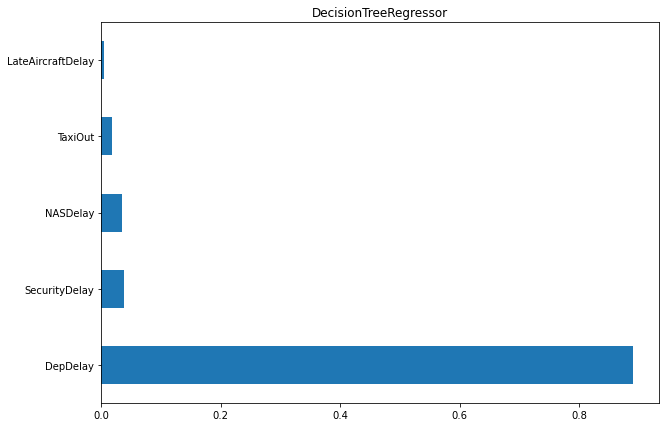

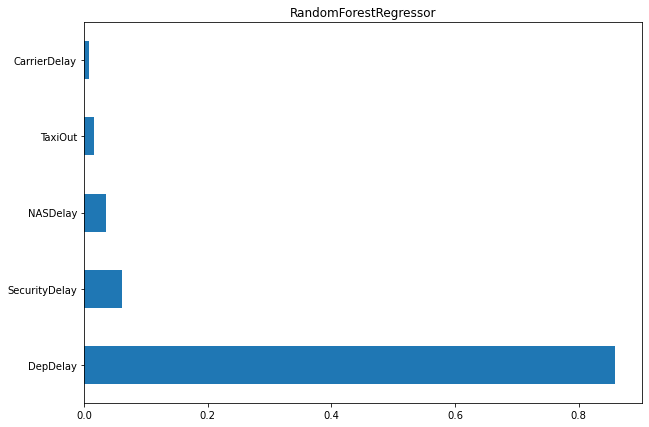

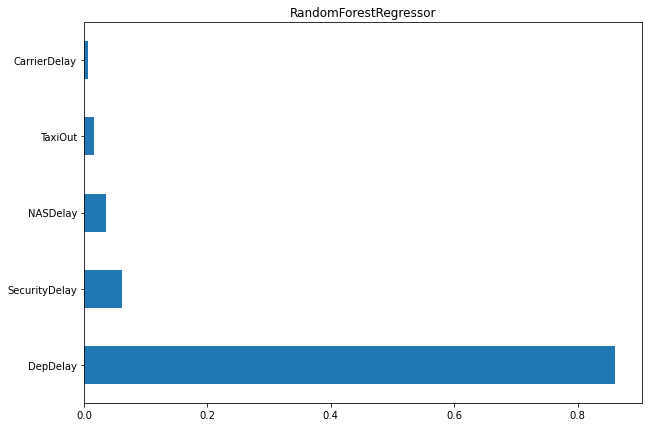

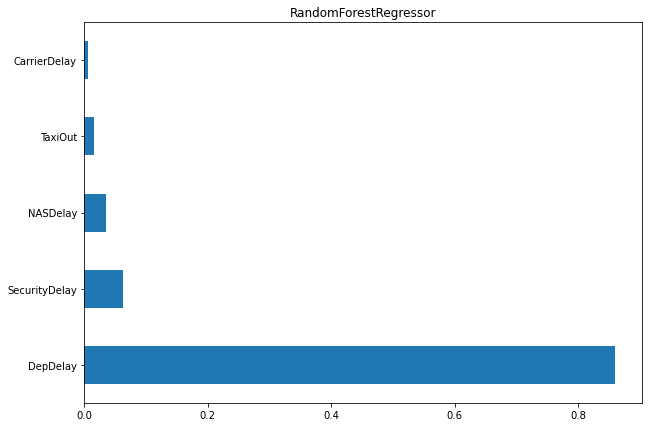

In [147]:
UseCaseModelizacion (df_sample,  X, y, X, y )

In [148]:
# Conclusiones: A pesar de cambiar los parámetros los resultados son los mismos. 
# No obstante El coeficiente de correlación es suficientemente alto.
    
# Veremos que resultados salen comparativamente con otros modelos de regresión.    

In [149]:
# Feature importance refers to techniques that assign a score to input features based on how useful 
# they are at predicting a target variable
# Por lo tanto estas "features" son las más relevantes para predecir la variable que estamos 
# prediciendo.

In [150]:
# Conclusiones: Utilizando el modelo de regresion Random Forest (en cualquiera de las dos versiones 
# que hemo hecho) mejora con respecto al modelo de regresión lineal.

# Hay que revisar en cuanto a las dos versiones de random forest modificando los parámetros. 
# La mejora de uno respecto al otro es muy sutil, pero hay mejora.


# COMPARACIÓN EN BASE A R2 
# El ajuste del modelo (coefficient of determination) en todos los modelos es superior a 0.90, 
# es bastante bueno.

# COMPARACIÓN EN BASE A MSE (mean squared error) #
# El error cuadrático medio es el criterio de evaluación más usado para problemas de aprendizaje 
# supervisado de regresión y nos proporciona información sobre cuán cerca están los puntos 
# de datos observados de los valores predichos del modelo. Cuanto mayor sea este valor, 
# peor es el modelo

# Para comprobar si el MSE se debe a valores atípicos. Para ello se calcula el MAE(mean_absolute_error), 
# donde el error se calcula como un promedio de diferencias absolutas entre los valores objetivo y 
# las predicciones. 

# En este caso todas las diferencias individuales se ponderan por igual en el promedio, 
# por lo que MAE (mean_absolute_error) es MENOS sensible a los valores atípicos que el 
# error cuadrático medio. 


In [151]:
# Conclusiones: Los resultados del modelo de arbol de regresion son peores que el modelo de 
# random forest.
# Las variables o caracteristicas más importantes (las 5 primeras) son las mismas excepto la 5, 
# que en random forest es "Carrier Delay" y en árbol de decisión es "LateAircraftDelay"

In [152]:
# Conclusiones: haciendo una aproximación traint/test y utilitzant totes les dades, el modelo que mejor 
# esultado da es el modelo de regresión polinomica en cuanto a los parámetros de error, sin embargo el El coeficiente de 
# determinación más alto lo da el modelo de regresión random forest.

# ou can also notice that polynomial regression yielded a higher coefficient of determination than multiple 
# linear regression for the same problem. At first, you could think that obtaining such a large 𝑅² is an excellent result. 
# It might be.

# However, in real-world situations, having a complex model and 𝑅² very close to 1 might also be a sign of overfitting. 
# To check the performance of a model, you should test it with new data, that is with observations not used to fit (train) 
# the model.

# Exercici 3
## Entrena’ls utilitzant els diferents paràmetres que admeten.

### Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.
### Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna):
### Vamos a comparar el rendimiento de los modelos (utilizando train/test), contrastando los datos que han sido predecidos por cada modelo con los datos reales. Así podremos comprobar qué modelo se ajusta más. 

## 2. MODELOS DE REGRESION CON train/test  #

########### MODELO DE REGRESIÓN LINEAL SIMPLE ############:


LinearRegression                                          :
- Normalize     = False 
- Fit_intercept = True  
El coeficiente de determinación del train es: 0.9830996792315131
El coeficiente de determinación del test  es: 0.9891633930223985
intercept                         : -3.492466748761032
Mean Absolute Error               : 2.414866780359931
Mean Squared Error                : 35.51471911996279
Root Mean Squared Error           : 5.959422717005632
-----------------------------------------------------------
LinearRegression                                          :
- Normalize     = False 
- Fit_intercept = False 
El coeficiente de determinación del train es: 0.9830996792315131
El coeficiente de determinación del test  es: 0.9891633930223983
intercept                         : 0.0
Mean Absolute Error               : 2.4148667803596946
Mean Squared Error                : 35.514719119963736
Root Mean Squared Error        

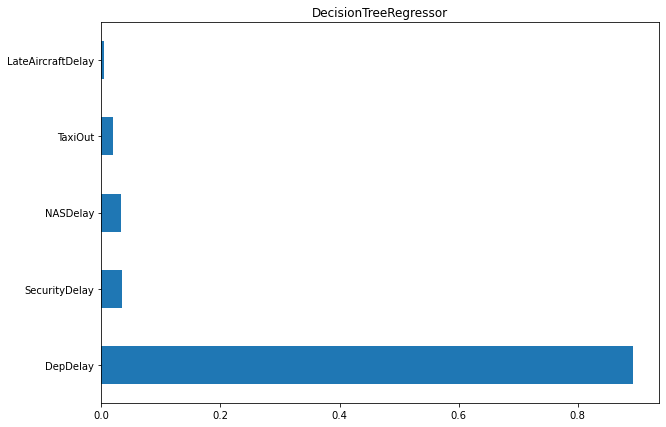

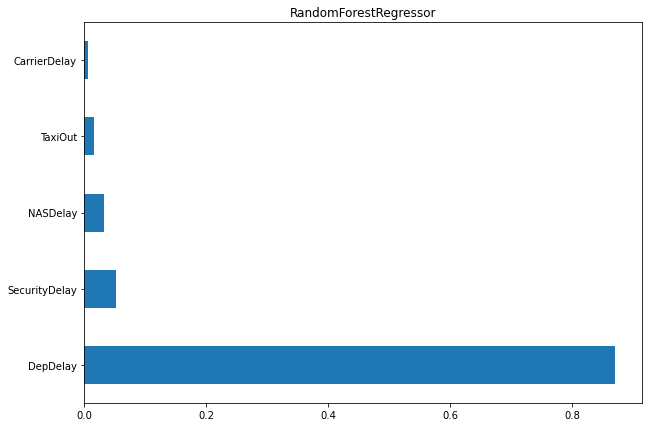

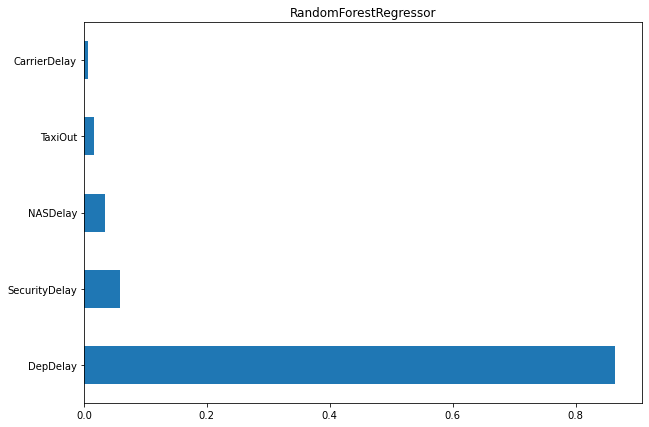

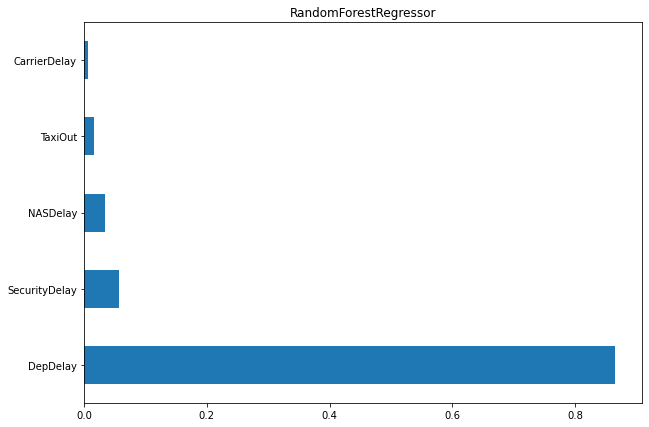

In [58]:
UseCaseModelizacion (df_sample,  X_train, y_train, X_test, y_test )

## 3. MODELO DE REGRESIÓN POLINÓMICA    


In [209]:
X1 = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X)# MODELO DE REGRESIÓN POLINÓMICA 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [211]:
print("Shape X1_train a         :", X1_train.shape)
print("Shape X1_test  a         :", X1_test.shape)
print("Shape y1_train a         :", y1_train.shape)
print("Shape y1_test  a         :", y1_test.shape)
print("Shape X1       a         :", X1.shape)
print("Shape X        a         :", X.shape)
print("Shape y        a         :", y.shape)
print("Shape df_sample a         :", df_sample.shape)

Shape X1_train a         : (80000, 4059)
Shape X1_test  a         : (20000, 4059)
Shape y1_train a         : (80000,)
Shape y1_test  a         : (20000,)
Shape X1       a         : (100000, 4059)
Shape X        a         : (100000, 27)
Shape y        a         : (100000,)
Shape df_sample a         : (100000, 28)


In [257]:
UseCaseModelizacion_vDecisionTree(df_sample,  X1_train, y1_train, X1_test, y1_test )

########### 1. MODELO DE REGRESIÓN LINEAL SIMPLE ############:


1.1. LinearRegression                                          :
- Normalize     = False 
- Fit_intercept = True  
El coeficiente de determinación del train es: 0.9893013377860914
El coeficiente de determinación del test  es: 0.9893943803630569
intercept                         : -4.304633424848376
Mean Absolute Error               : 4.126123213637258
Mean Squared Error                : 34.772377184375806
Root Mean Squared Error           : 5.896810763826139
Duration: 0.014915200008545071 sec
-----------------------------------------------------------
1.2. LinearRegression                                          :
- Normalize     = False 
- Fit_intercept = False 
El coeficiente de determinación del train es: 0.9859305219692496
El coeficiente de determinación del test  es: 0.9859221769783599
intercept                         : 0.0
Mean Absolute Error               : 3.3764057845460353
Mean Squared Error                : 4

# Exercici 4
## Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

## MODELO DE ARBOL DE REGRESIÓN

## Visualització de l'efecte del paràmete max_depth en el MAE de train i test. max depth = rang (1-50):

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]


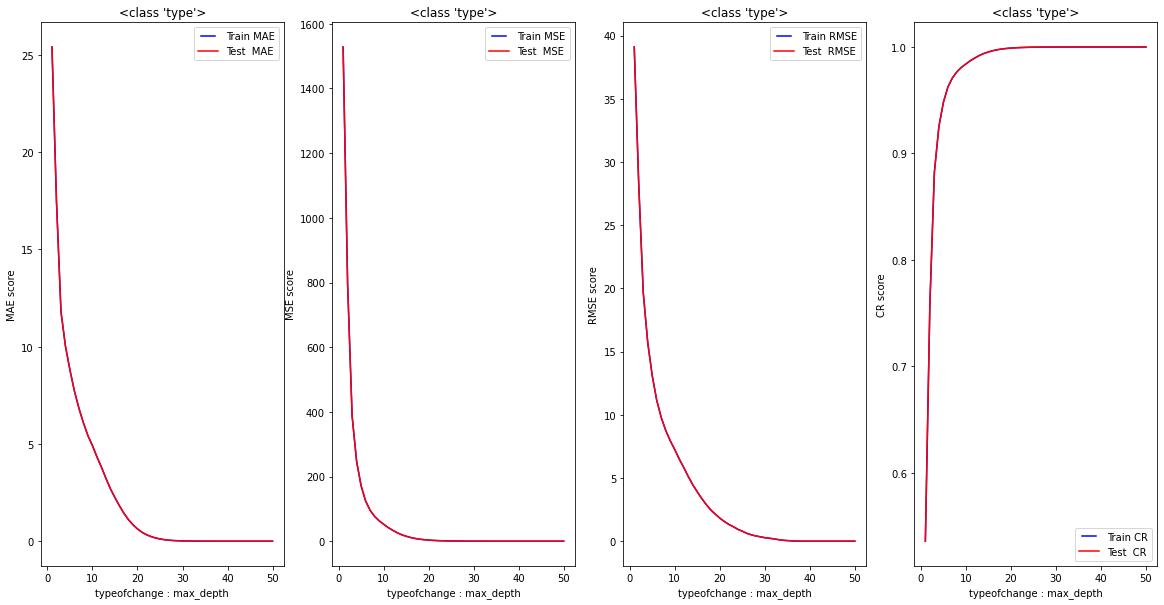

Duration: 67.24094080000032 sec


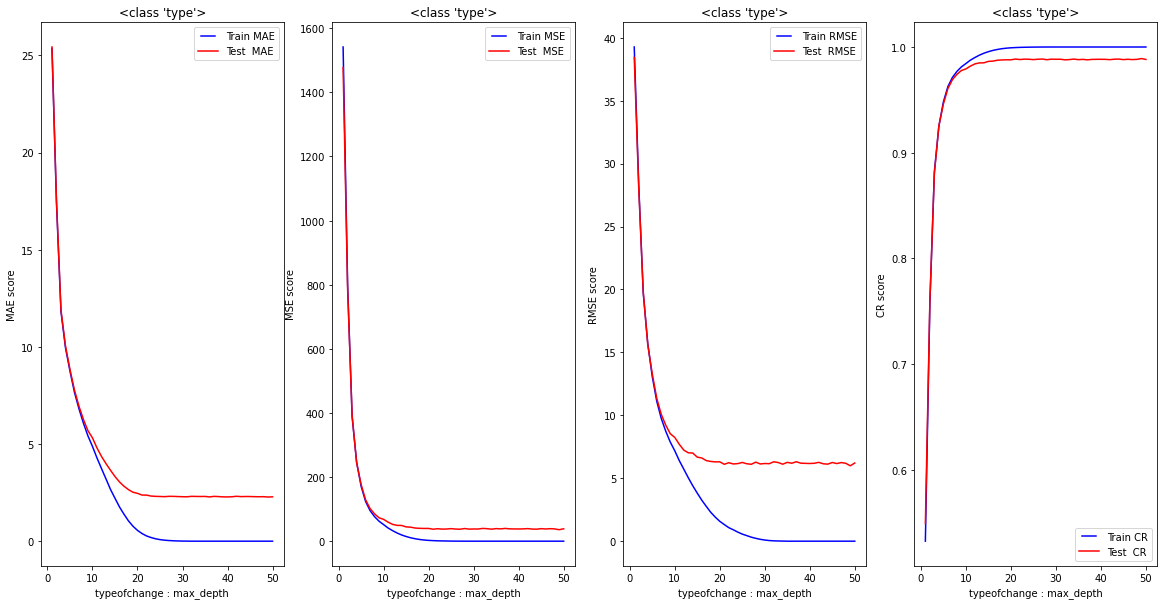

Duration: 52.351346999999805 sec


In [154]:
#max_depths = np.linspace(1, 5, 5, endpoint=True)
max_depths = np.linspace(1, 50, 50, endpoint=True)
print(max_depths)
RegressionChart(max_depths, 'DecisionTreeRegressor', 'max_depth',  X, y, X, y)

RegressionChart(max_depths, 'DecisionTreeRegressor', 'max_depth',  X_train, y_train, X_test, y_test)


In [101]:
# Cuanto mayor es el "max_depth" el MAE es menor, pero aumenta la diferencia del MAE entre el dataset de train i test

## Visualització de l'efecte del paràmete min_samples_split en el MAE de train i test. min_samples_split = rang(0.1 -1):

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


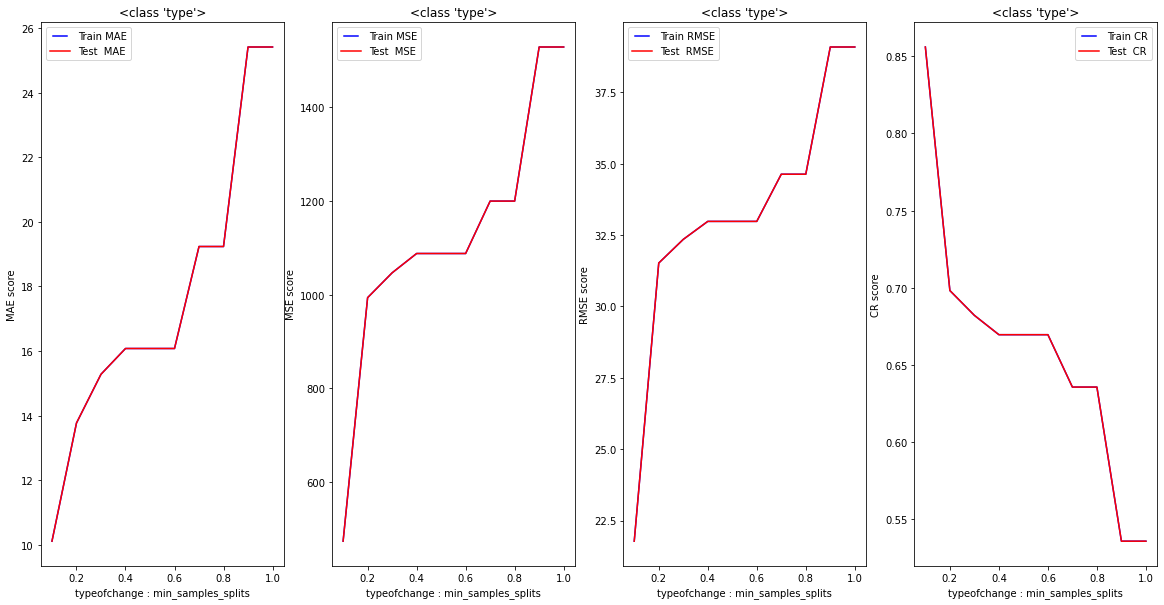

Duration: 2.362283300000854 sec


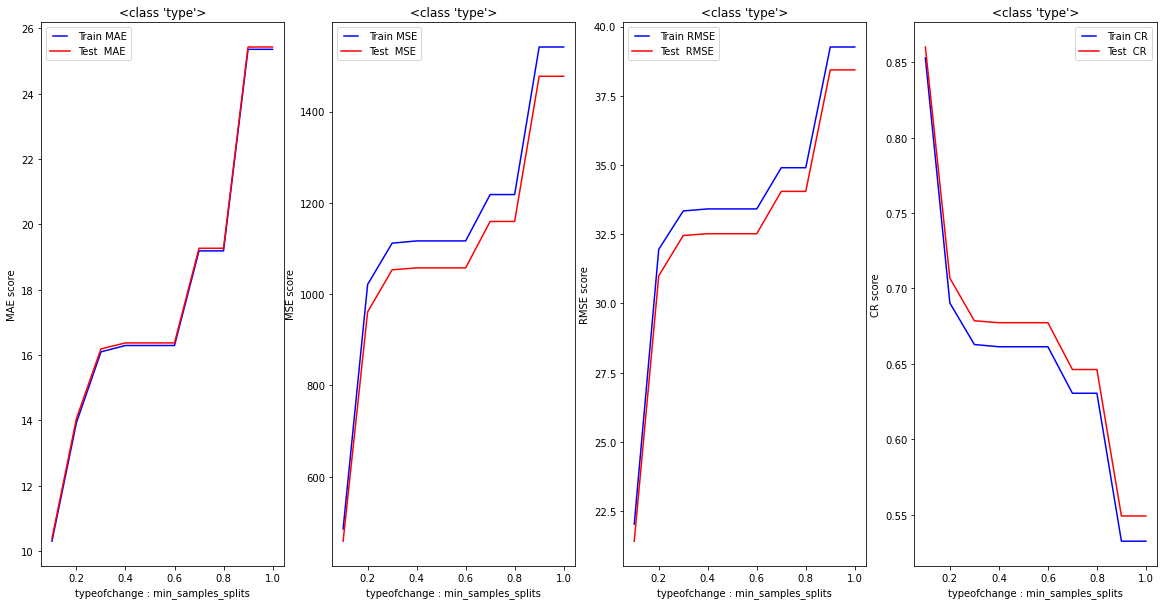

Duration: 2.0064480999990337 sec


In [155]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
print(min_samples_splits)
RegressionChart(min_samples_splits, 'DecisionTreeRegressor', 'min_samples_splits',  X, y, X, y)
RegressionChart(min_samples_splits, 'DecisionTreeRegressor', 'min_samples_splits',  X_train, y_train, X_test, y_test)


In [156]:
# Cuanto mayor es el "min_samples_split" el MAE es mayor, y no hay diferencia de MAE entre el dataset de train i test

## Visualització de l'efecte del paràmete min_samples_leaf en el MAE de train i test. min_samples_leaf = rang(0.01 -0.5):

[0.001      0.02726316 0.05352632 0.07978947 0.10605263 0.13231579
 0.15857895 0.18484211 0.21110526 0.23736842 0.26363158 0.28989474
 0.31615789 0.34242105 0.36868421 0.39494737 0.42121053 0.44747368
 0.47373684 0.5       ]


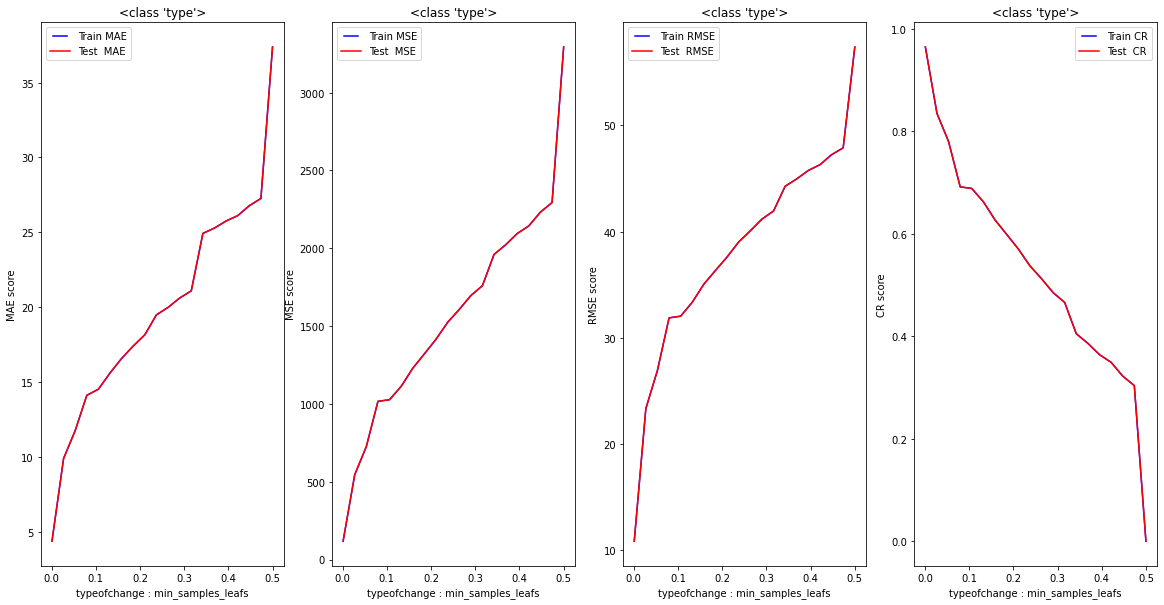

Duration: 4.384238700000424 sec


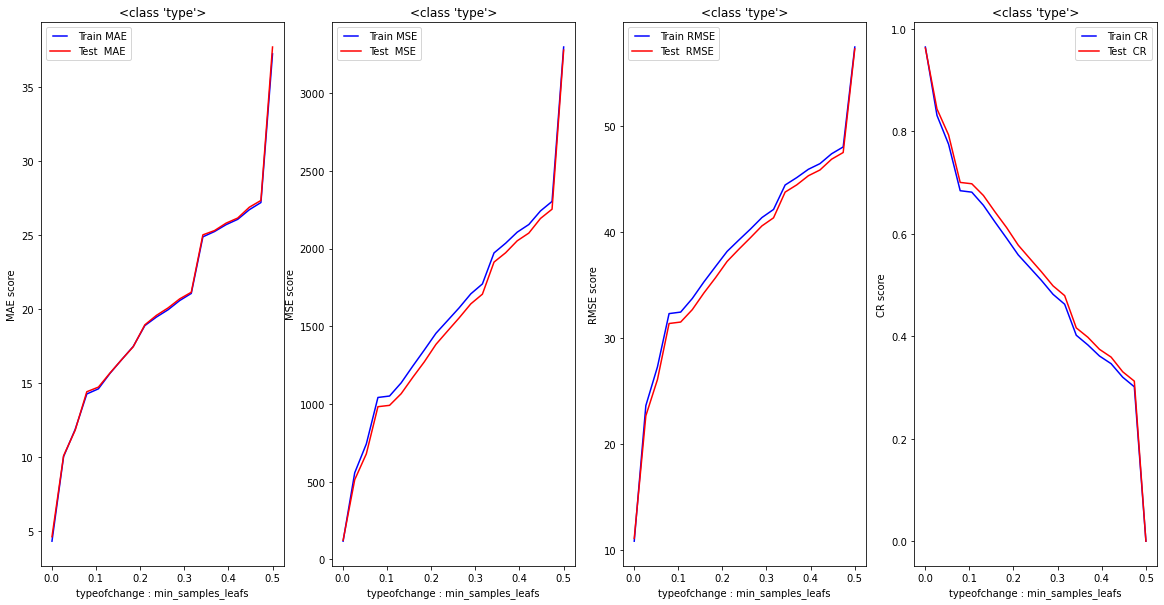

Duration: 3.564201099999991 sec


In [157]:
min_samples_leafs = np.linspace(0.001, 0.5, 20, endpoint=True)
print(min_samples_leafs)
RegressionChart(min_samples_leafs, 'DecisionTreeRegressor', 'min_samples_leafs', X, y, X, y)
RegressionChart(min_samples_leafs, 'DecisionTreeRegressor', 'min_samples_leafs', X_train, y_train, X_test, y_test)


In [158]:
# Cuanto mayor es el "min_samples_leafs" el MAE es mayor, y no hay diferencia de MAE entre el dataset de train i test

## Visualització de l'efecte del paràmete max_features en el MAE de train i test. max_features = rang(1-16):

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


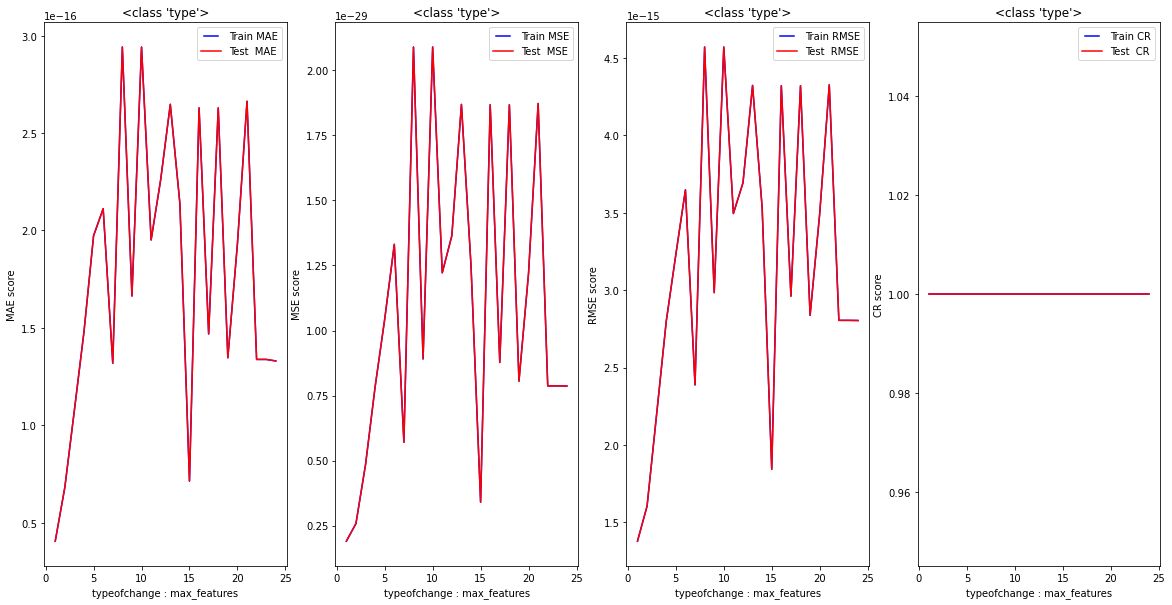

Duration: 26.10007339999902 sec


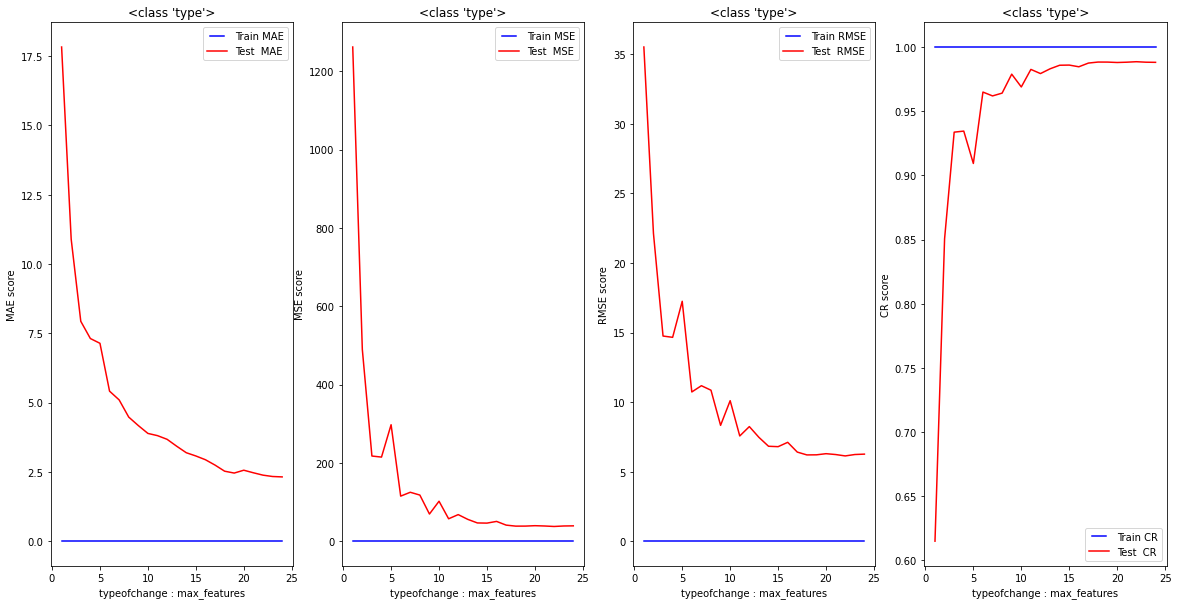

Duration: 19.061692200000834 sec


In [159]:
max_features = list(range(1,df_sample.shape[1]))

print(max_features)
RegressionChart(max_features, 'DecisionTreeRegressor', 'max_features', X, y, X, y)

RegressionChart(max_features, 'DecisionTreeRegressor', 'max_features', X_train, y_train, X_test, y_test)


In [160]:
# Conclusió: canviem el paràmetre max_depth a 15. Deixem min_samples_leaf i min_samples_split per defecte al mínim. D'aquesta manera aconseguim reduïr els marges d'errors en les 3 mesures de correció emprades (MAE, MSE, RMSE) en comparació a l'estimació inicial.
# Quantes més variable "max_features" el MAE se reduce.

## MODELO DE REGRESIÓN RANDOM FOREST #

# Visualització de l'efecte del paràmetre N_estimators en el MAE de train i test.

[1, 2, 4, 8, 16, 32, 64, 100, 200]


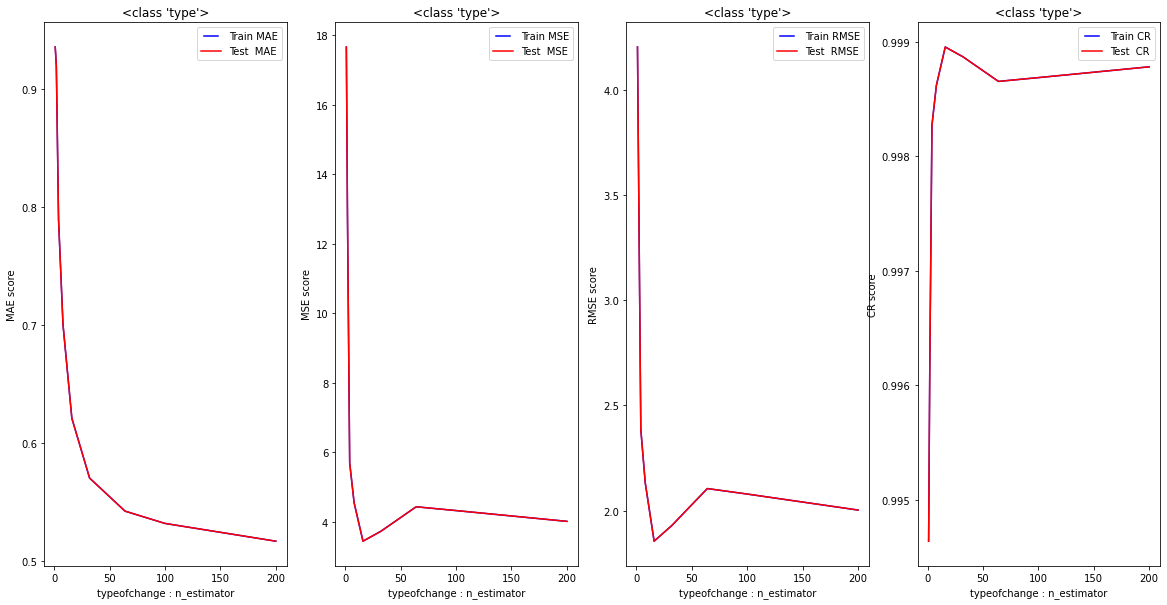

Duration: 176.68416210000032 sec


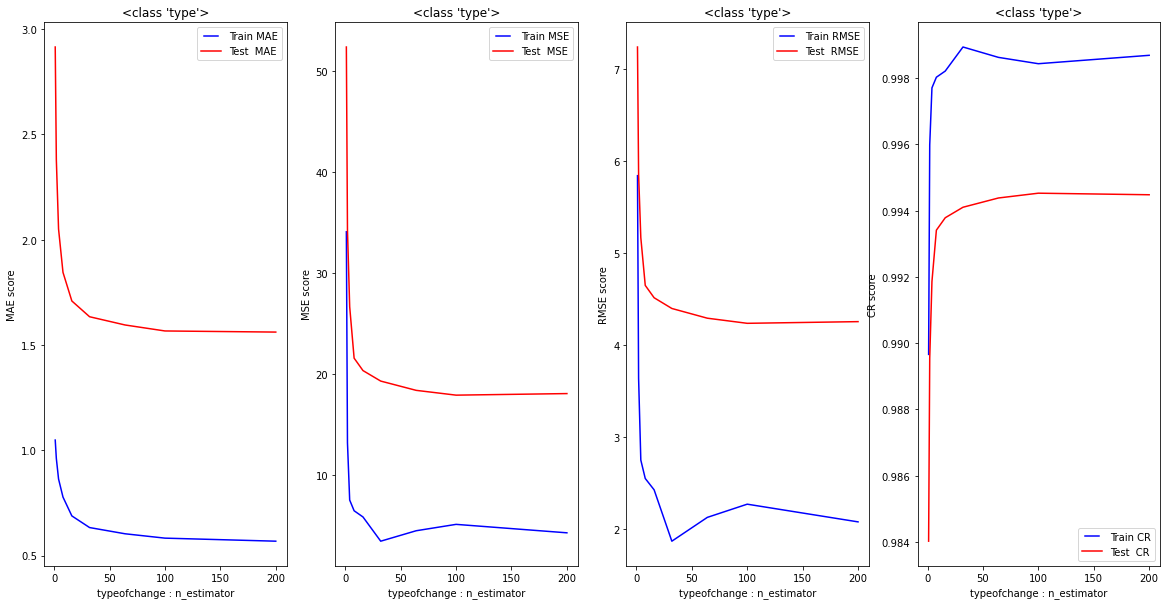

Duration: 135.3303874000012 sec


In [161]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

print(n_estimators)
RegressionChart(n_estimators,'RandomForestRegressor', 'n_estimator', X, y, X, y)

RegressionChart(n_estimators,'RandomForestRegressor', 'n_estimator', X_train, y_train, X_test, y_test)


## Visualització de l'efecte del paràmete max_depth en el MAE de train i test. max depth = rang (1-50):

[ 1.   13.25 25.5  37.75 50.  ]


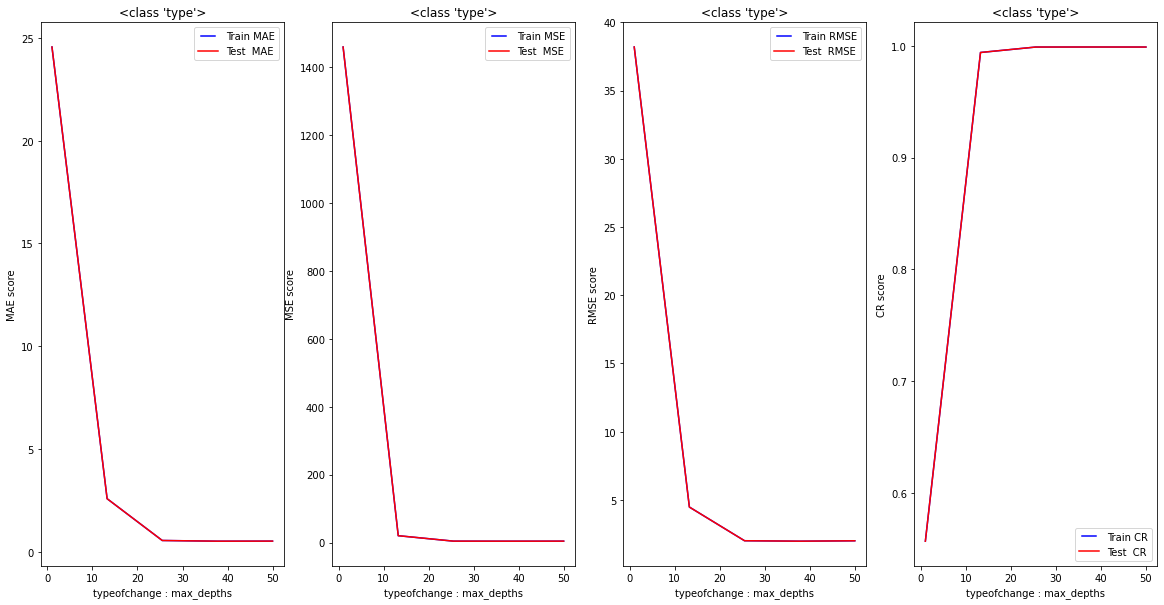

Duration: 445.51271019999876 sec


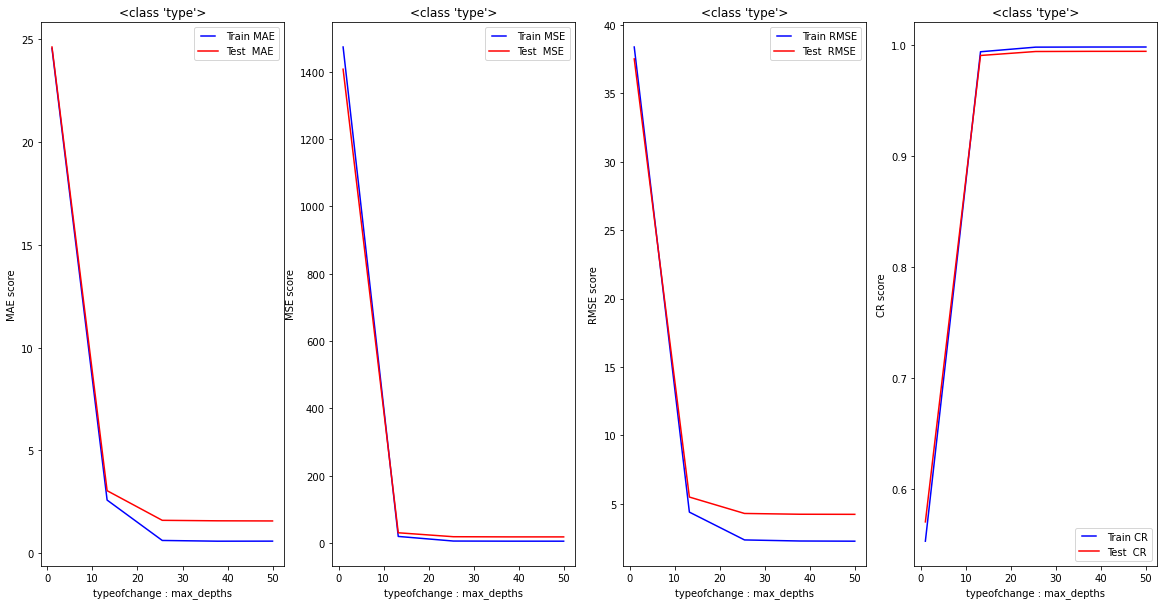

Duration: 298.6919269000009 sec


In [162]:
max_depths = np.linspace(1, 50, 5, endpoint=True)

print(max_depths)
RegressionChart(max_depths,'RandomForestRegressor', 'max_depths',X, y, X, y)

RegressionChart(max_depths,'RandomForestRegressor', 'max_depths',X_train, y_train, X_test, y_test)


## Visualització de l'efecte del paràmete min_samples_split en el MAE de train i test. min_samples_split = rang(0.1 -1):

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


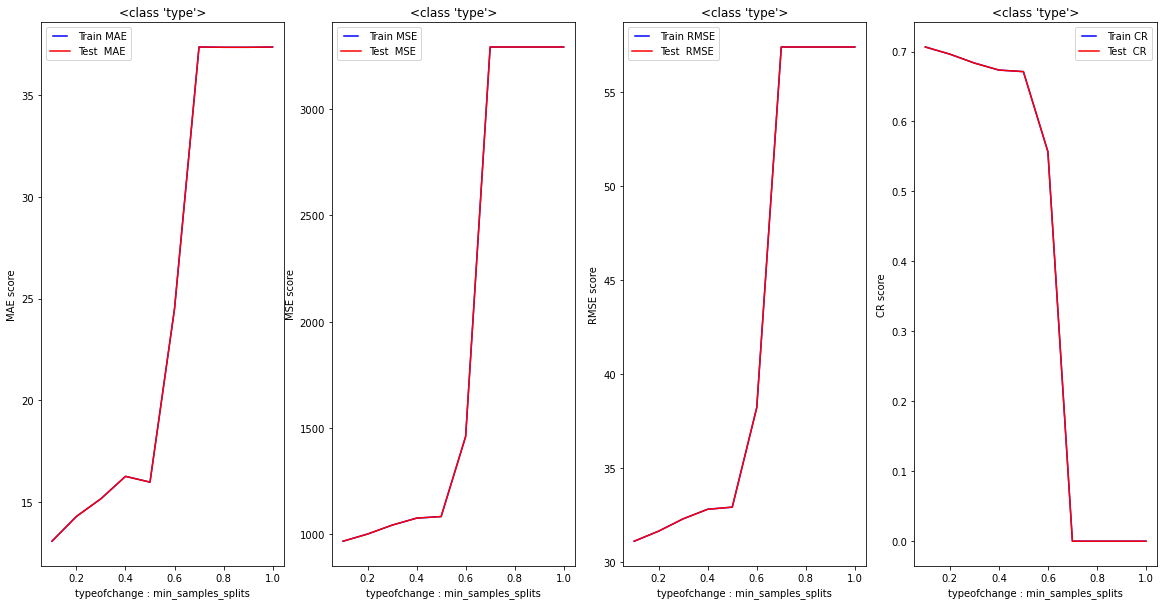

Duration: 92.94772639999974 sec


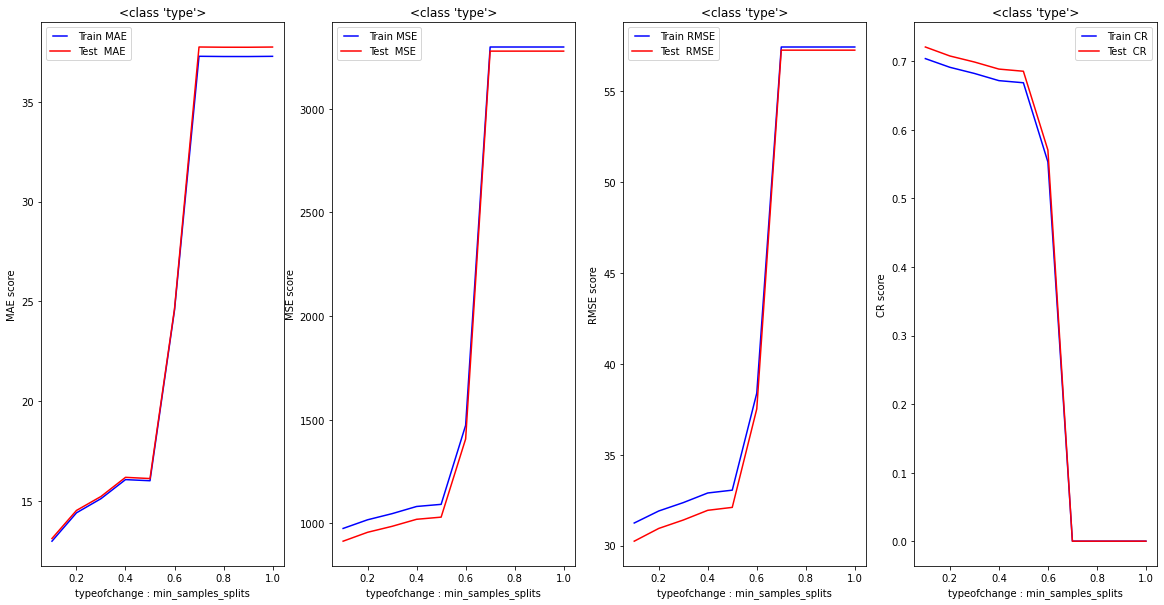

Duration: 122.7955877000004 sec


In [163]:

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
print(min_samples_splits)
train_results = []
test_results = []
RegressionChart(min_samples_splits,'RandomForestRegressor', 'min_samples_splits',X, y, X, y)
RegressionChart(min_samples_splits,'RandomForestRegressor', 'min_samples_splits',X_train, y_train, X_test, y_test)


## Visualització de l'efecte del paràmete min_samples_leaf en el MAE de train i test. min_samples_leaf = rang(0.01 -0.5):

[0.1 0.2 0.3 0.4 0.5]


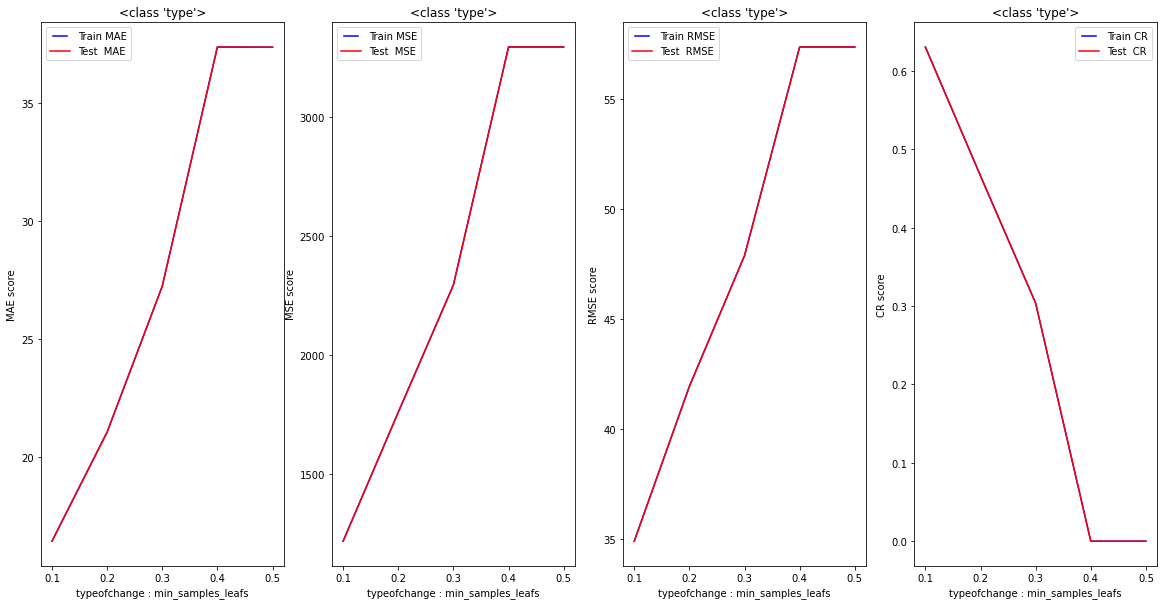

Duration: 38.71707180000158 sec


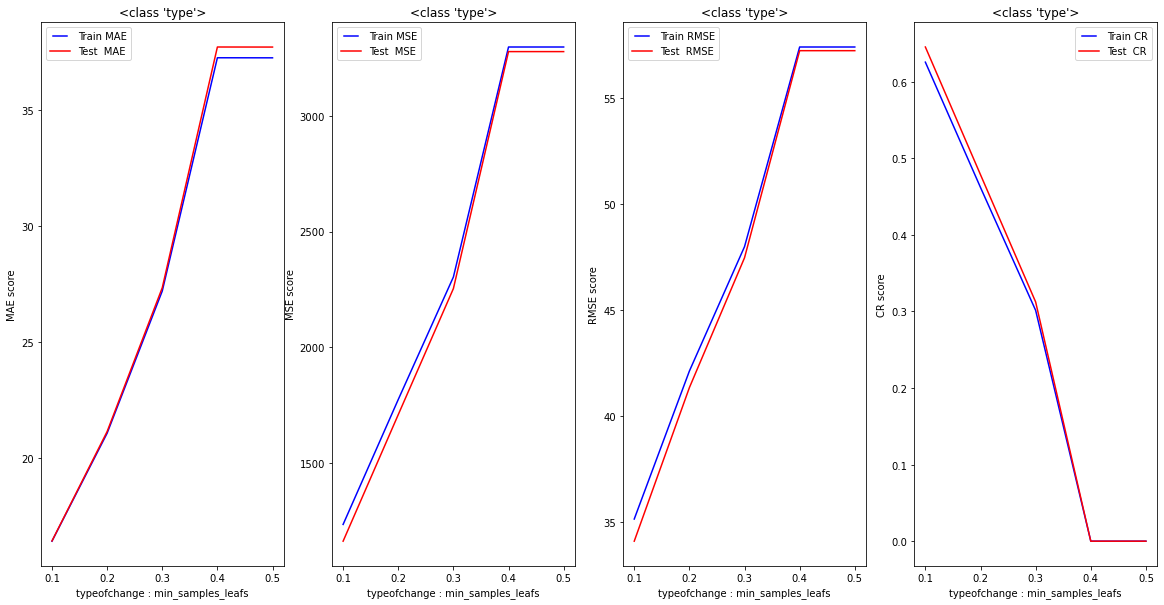

Duration: 27.14695329999995 sec


In [164]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

print(min_samples_leafs)
RegressionChart(min_samples_leafs,'RandomForestRegressor', 'min_samples_leafs',X, y, X, y)

RegressionChart(min_samples_leafs,'RandomForestRegressor', 'min_samples_leafs',X_train, y_train, X_test, y_test)


## Visualització de l'efecte del paràmete max_features en el MAE de train i test. max_features = rang(1-16):

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


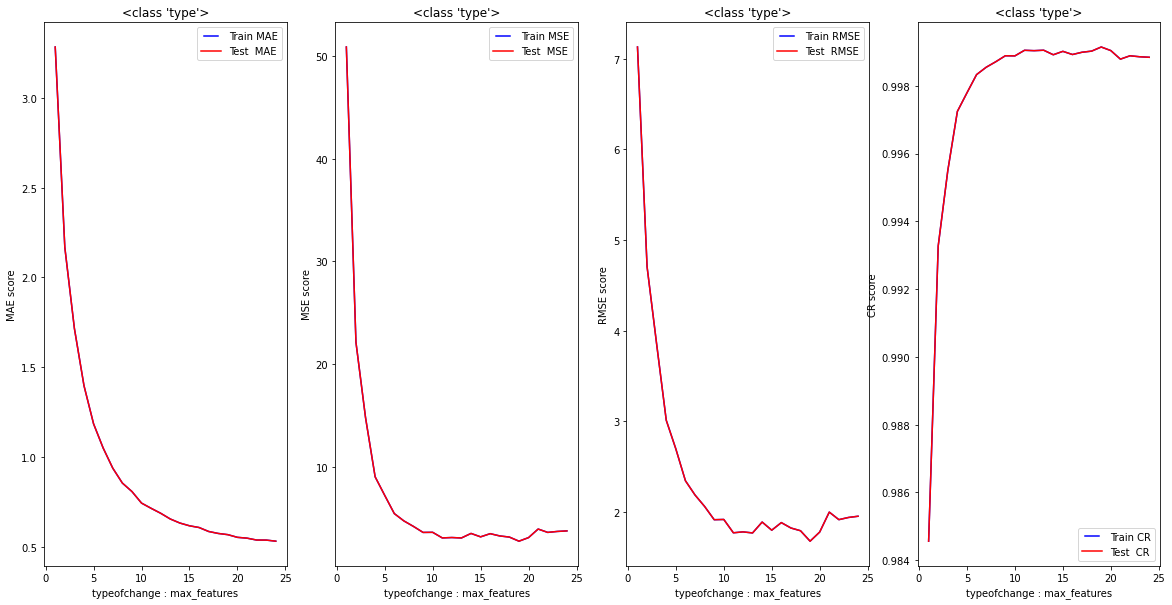

Duration: 4794.985709199998 sec


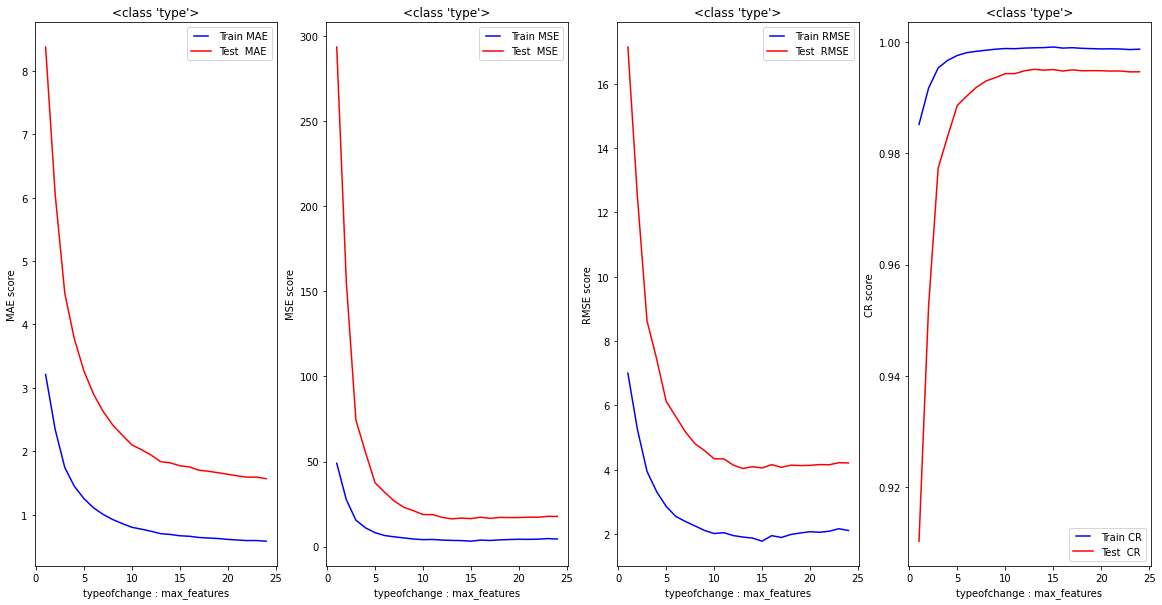

Duration: 1334.5442220999976 sec


In [166]:
max_features = list(range(1,df_sample.shape[1]))

print(max_features)
RegressionChart(max_features,'RandomForestRegressor', 'max_features',X, y, X, y)

RegressionChart(max_features,'RandomForestRegressor', 'max_features',X_train, y_train, X_test, y_test)


In [167]:
#Conclusió: en el cas del # Random Forest Regressor podem canviar principalment el paràmetre del número d'arbres que volem generar. En el cas del nostre dataset, el cost computacional és molt gran així que hem canviat el parametre per defecte(100) a 500. Tambe hem fet servir el 'random_state', per tenir resultats reproduibles, i canviat el 'max_features' a 'sqrt'.

# Comportament de les variables és practicament el mateix: quant més gran el paràmetre max_depth, i deixant min_samples_leaf i min_samples_split per defecte al mínim, s'aconseguim reduïr els marges d'errors en les 3 mesures de correció emprades (MAE, MSE, RMSE) en comparació a l'estimació inicial.


# Nivell 2
## Exercici 5
### Realitza algun procés d’enginyeria de variables per millorar-ne la predicció


In [168]:
# Es realitza procés d’enginyeria de variables per millorar-ne la predicció

# En los ejercicios anteriores hemos visto que el modelo de regresión lineal simple era el menos preciso, por muy poco, de los 3
# modelos, pero quizá podría mejorarse el el algoritmo si eliminamos los outliers y standarizamos los valores y, por tanto, 
# realizar predicciones mucho más ajustadas. Vamos a verlo.  

# Fins ara el que hem fet en relació a la enginyeria de variables ha estat: eliminar columnes categòriques, imputar els null values i visualitzar els features importance dels algoritmes de Decision Tree i Random Forest.
# Ara intentarem millorar els models inicials o si més no veure quin efecte tenen diferents maneres de fer enginyeria de variables.


In [169]:
#Recuperació de les variables categòriques
df = df_original.copy()
df


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [170]:
df.head(5)

# Eliminem les features que no aporten

df_1 = df
df_1.drop('Unnamed: 0', axis=1, inplace = True)
df_1


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [171]:
# Que variables categoricas hay para hacer un codificacion y poder utilizar en los modelos de regresión

for i in df_1.columns:
    # Matriz de correlación  #
    if df_1[i].dtypes == object :   
        print("Columna categorica : ", i)

Columna categorica :  UniqueCarrier
Columna categorica :  TailNum
Columna categorica :  Origin
Columna categorica :  Dest
Columna categorica :  CancellationCode


In [172]:
df_1 = Encoder(df_1, 'Origin') 
df_1 = Encoder(df_1, 'Dest') 
df_1 = Encoder(df_1, 'UniqueCarrier') 
df_1 = Encoder(df_1, 'CancellationCode') 

df_1.drop('TailNum', axis=1, inplace = True)



In [173]:
#comprobamos que despues de los cambios ya no hayan columnas con NAN
total_nan_values = df_1.isna().sum()
print ("Total Number of NaN values: "+'\n'+str(total_nan_values))

Total Number of NaN values: 
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64


In [174]:
for i in df_1.columns:
    df_1[i].fillna(df_1[i].median(), inplace = True)

In [175]:
#comprobamos que despues de los cambios ya no hayan columnas con NAN
total_nan_values = df_1.isna().sum()
print ("Total Number of NaN values: "+'\n'+str(total_nan_values))

Total Number of NaN values: 
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


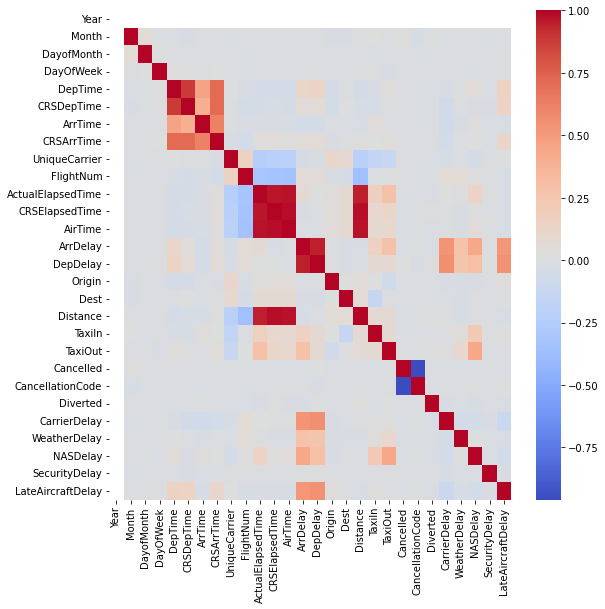

In [176]:
from seaborn import heatmap
corr = df_1.corr() # train is a pandas dataframe 

plt.figure(figsize = (9, 9))
heatmap(corr, cmap = 'coolwarm')
plt.show()

In [177]:
#para no trabajar con casi 2millones de registros y no penalizar el coste de proceso en este ejercicio, tomamos 100.000 registros para trabajar
df_sample = df_1.sample(100000, random_state = 0)
X = np.array(df_sample.drop([forecast_col], 1))
y = np.array(df_sample[forecast_col])
print(len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

100000 100000


In [178]:
#Modelización del caso de uso

########### 1. MODELO DE REGRESIÓN LINEAL SIMPLE ############:


1.1. LinearRegression                                          :
- Normalize     = False 
- Fit_intercept = True  
El coeficiente de determinación del train es: 0.9934281155357932
El coeficiente de determinación del test  es: 0.9943719474480055
intercept                         : -15.575421955373805
Mean Absolute Error               : 2.7820604803960594
Mean Squared Error                : 18.45255372630452
Root Mean Squared Error           : 4.295643575333563
Duration: 0.07799470000099973 sec
-----------------------------------------------------------
1.2. LinearRegression                                          :
- Normalize     = False 
- Fit_intercept = False 
El coeficiente de determinación del train es: 0.9934281155357932
El coeficiente de determinación del test  es: 0.9943719474480055
intercept                         : 0.0
Mean Absolute Error               : 2.782060480396092
Mean Squared Error                : 18

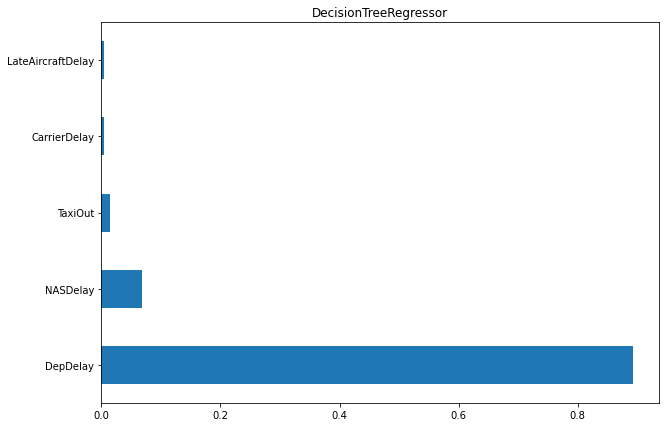

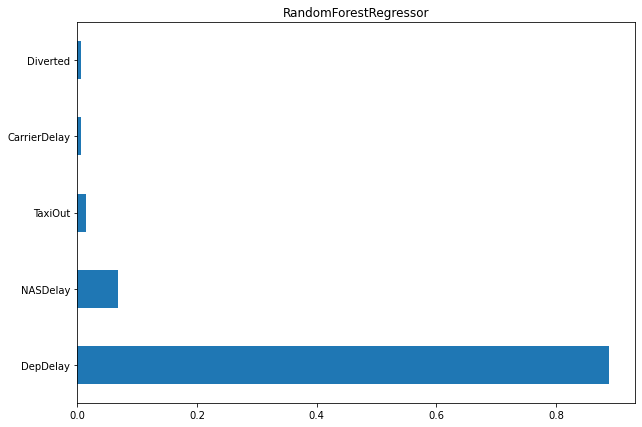

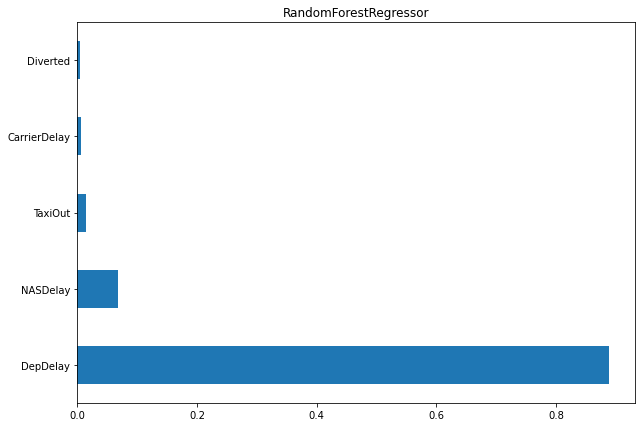

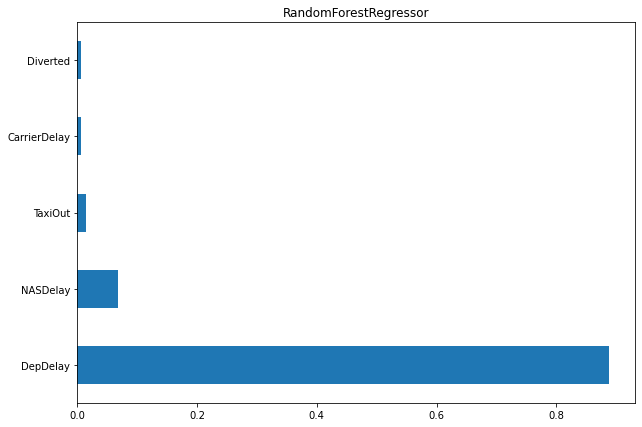

In [179]:
UseCaseModelizacion (df_sample,  X_train, y_train, X_test, y_test )

In [182]:
#Conclusion: Random forest es el mejor coeficiente y MAE da, aunque Regresión linea da mejor MSE y RMSE. 

In [183]:
#Estandarització:

In [184]:
# Només cal que escalem els features, així el resultat ens surt sense escalar, com el volem:

X1 = StandardScaler().fit_transform(X)
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

########### 1. MODELO DE REGRESIÓN LINEAL SIMPLE ############:


1.1. LinearRegression                                          :
- Normalize     = False 
- Fit_intercept = True  
El coeficiente de determinación del train es: 0.9934281155357932
El coeficiente de determinación del test  es: 0.9943719474480055
intercept                         : -15.575421955373805
Mean Absolute Error               : 2.7820604803960594
Mean Squared Error                : 18.45255372630452
Root Mean Squared Error           : 4.295643575333563
Duration: 0.06036100000346778 sec
-----------------------------------------------------------
1.2. LinearRegression                                          :
- Normalize     = False 
- Fit_intercept = False 
El coeficiente de determinación del train es: 0.9934281155357932
El coeficiente de determinación del test  es: 0.9943719474480055
intercept                         : 0.0
Mean Absolute Error               : 2.782060480396092
Mean Squared Error                : 18

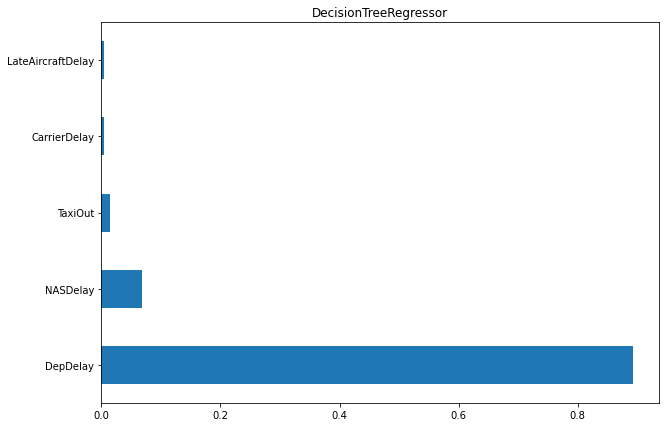

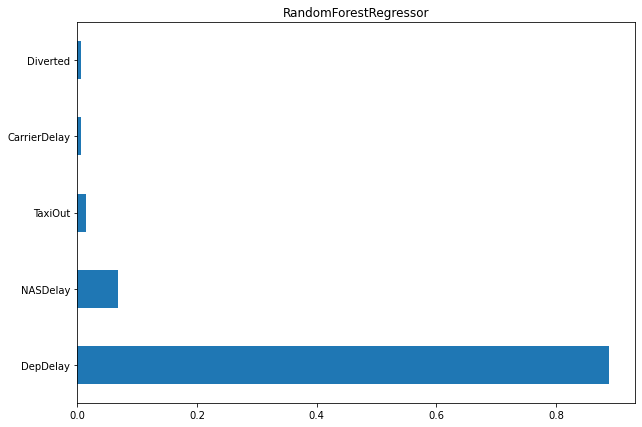

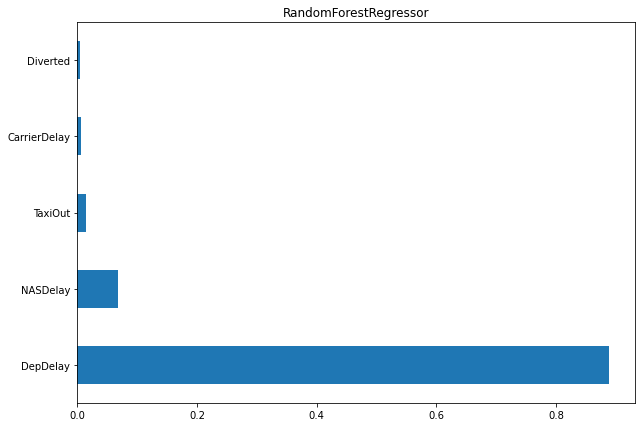

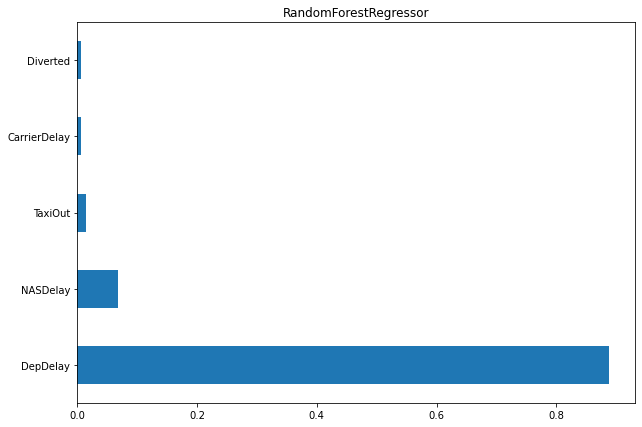

In [185]:
UseCaseModelizacion (df_sample, X1_train, y1_train, X1_test, y1_test )

In [186]:
#Conclusiones: Identicas conclusiones que en el caso anterior.

In [187]:
#Normalització

In [188]:
X1 =preprocessing.normalize(X)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

########### 1. MODELO DE REGRESIÓN LINEAL SIMPLE ############:


1.1. LinearRegression                                          :
- Normalize     = False 
- Fit_intercept = True  
El coeficiente de determinación del train es: 0.9489444030362361
El coeficiente de determinación del test  es: 0.9486890985708964
intercept                         : 49.63402425897202
Mean Absolute Error               : 7.422321336702419
Mean Squared Error                : 168.23175629909682
Root Mean Squared Error           : 12.970418509018774
Duration: 0.05038380000041798 sec
-----------------------------------------------------------
1.2. LinearRegression                                          :
- Normalize     = False 
- Fit_intercept = False 
El coeficiente de determinación del train es: 0.9467981872068769
El coeficiente de determinación del test  es: 0.9462752160970092
intercept                         : 0.0
Mean Absolute Error               : 7.681768374559967
Mean Squared Error                : 176

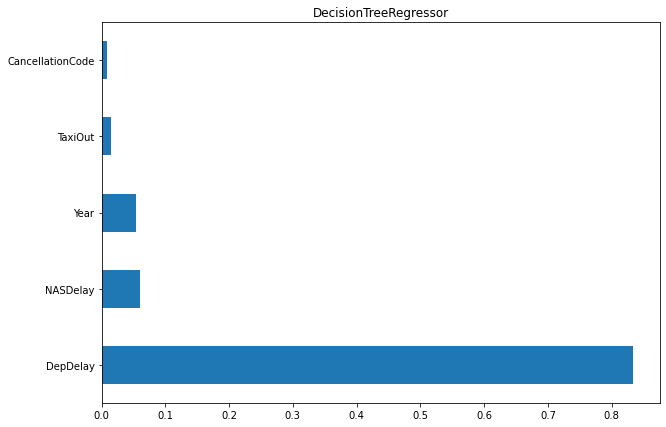

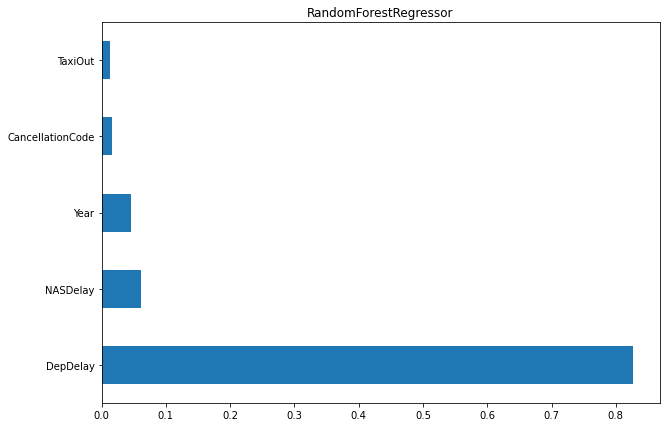

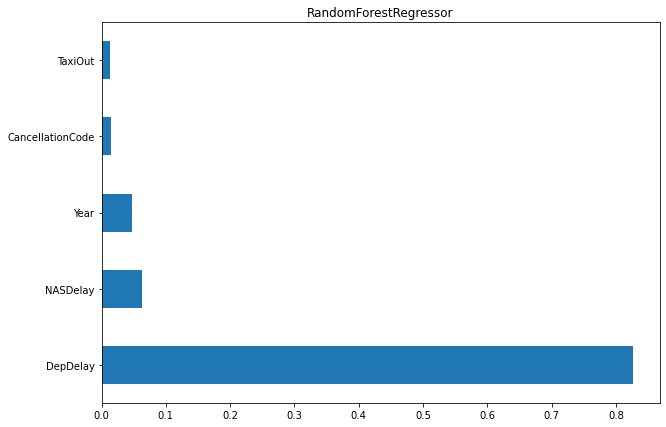

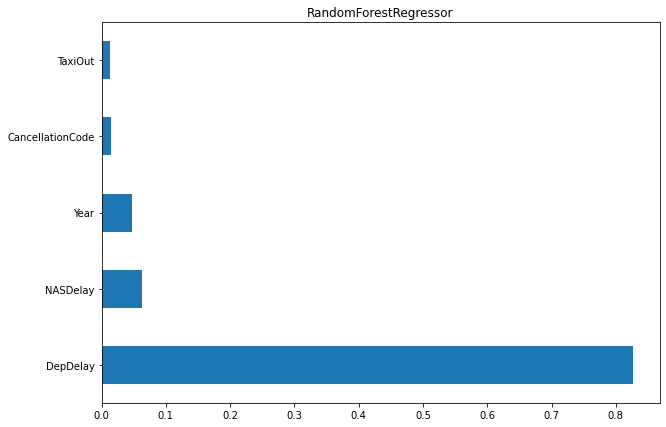

In [189]:
UseCaseModelizacion (df_sample, X1_train, y1_train, X1_test, y1_test )

In [190]:
# Conclusiones: En este caso RandomForest es el que mejor resultados da.

In [191]:
#Transformació logarítmica dels features

In [192]:
# Transformació dels features a log.
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import QuantileTransformer, quantile_transform

X1 = quantile_transform(X, n_quantiles=900, output_distribution='normal', copy=True, random_state = 0).squeeze()

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

########### 1. MODELO DE REGRESIÓN LINEAL SIMPLE ############:


1.1. LinearRegression                                          :
- Normalize     = False 
- Fit_intercept = True  
El coeficiente de determinación del train es: 0.9934281155357932
El coeficiente de determinación del test  es: 0.9943719474480055
intercept                         : -15.575421955373805
Mean Absolute Error               : 2.7820604803960594
Mean Squared Error                : 18.45255372630452
Root Mean Squared Error           : 4.295643575333563
Duration: 0.06853309999860357 sec
-----------------------------------------------------------
1.2. LinearRegression                                          :
- Normalize     = False 
- Fit_intercept = False 
El coeficiente de determinación del train es: 0.9934281155357932
El coeficiente de determinación del test  es: 0.9943719474480055
intercept                         : 0.0
Mean Absolute Error               : 2.782060480396092
Mean Squared Error                : 18

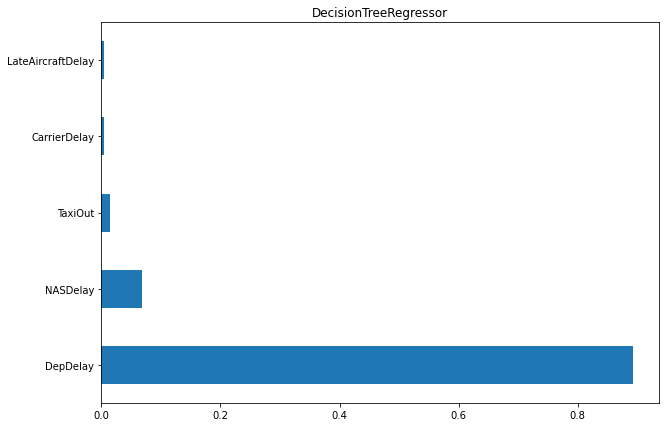

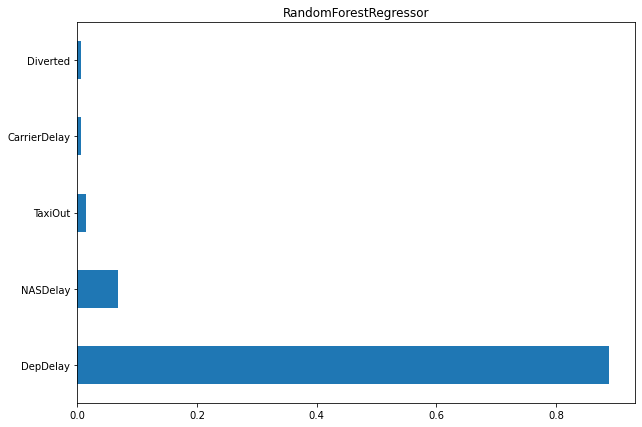

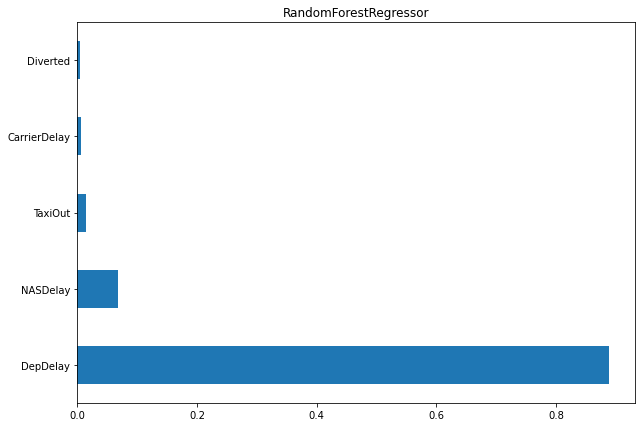

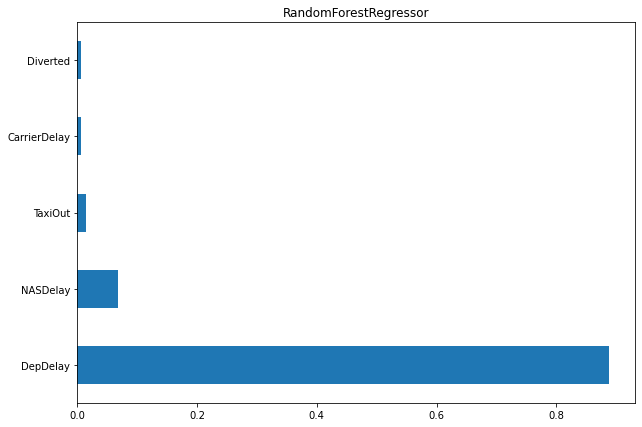

In [193]:
UseCaseModelizacion (df_sample, X1_train, y1_train, X1_test, y1_test )

In [194]:
# Conclusiones: En este caso RandomForest es el que mejor resultados da.

In [195]:
# PCA

In [212]:
# Abans d'aplicar el PCA hem d'estanderitzar les dades:
X1 = StandardScaler().fit_transform(X)
# Principal Component Analysys

pca = PCA(n_components=0.9)
X1 = pca.fit_transform(X1)

print('La variància de cada un dels components seleccionats és:',pca.explained_variance_ratio_) # Treiem els variance ratio del número de components seleccionats
print('La suma de la variància de tots els components seleccionats:',pca.explained_variance_ratio_.sum()) # Sumem el variance ratio per veure quanta informació treiem amb el número de PCA

#Per retenir un 90% de la informació total fent servir PCA, ens hem de quedar amb 15 dels 20 atributs totals. No és un PCA molt eficaç.

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

La variància de cada un dels components seleccionats és: [0.16153152 0.11388473 0.07571555 0.07353252 0.05797435 0.04492533
 0.04312939 0.0409883  0.04038816 0.03903002 0.03860123 0.03847313
 0.03802615 0.03586501 0.03289627 0.03195477]
La suma de la variància de tots els components seleccionats: 0.9069164353803166


In [213]:
print("Shape X1_train a         :", X1_train.shape)
print("Shape X1_test  a         :", X1_test.shape)
print("Shape y1_train a         :", y1_train.shape)
print("Shape y1_test  a         :", y1_test.shape)
print("Shape X1       a         :", X1.shape)
print("Shape X        a         :", X.shape)
print("Shape y        a         :", y.shape)
print("Shape df_sample a         :", df_sample.shape)

Shape X1_train a         : (80000, 16)
Shape X1_test  a         : (20000, 16)
Shape y1_train a         : (80000,)
Shape y1_test  a         : (20000,)
Shape X1       a         : (100000, 16)
Shape X        a         : (100000, 27)
Shape y        a         : (100000,)
Shape df_sample a         : (100000, 28)


In [258]:
UseCaseModelizacion_vDecisionTree (df_sample, X1_train, y1_train, X1_test, y1_test )

########### 1. MODELO DE REGRESIÓN LINEAL SIMPLE ############:


1.1. LinearRegression                                          :
- Normalize     = False 
- Fit_intercept = True  
El coeficiente de determinación del train es: 0.9893013377860914
El coeficiente de determinación del test  es: 0.9893943803630569
intercept                         : -4.304633424848376
Mean Absolute Error               : 4.126123213637258
Mean Squared Error                : 34.772377184375806
Root Mean Squared Error           : 5.896810763826139
Duration: 0.01102540000283625 sec
-----------------------------------------------------------
1.2. LinearRegression                                          :
- Normalize     = False 
- Fit_intercept = False 
El coeficiente de determinación del train es: 0.9859305219692496
El coeficiente de determinación del test  es: 0.9859221769783599
intercept                         : 0.0
Mean Absolute Error               : 3.3764057845460353
Mean Squared Error                : 46

In [198]:
# Feature selection amb f_regression

In [214]:
features = getTopFeatures(X,y) 
features

columns = []
for i in features:
    x = df_1.columns[i]
    columns.append(x)
    
#print(columns)

df_top_features = df_1[columns]
# Afegim el target al nou df:

#df_top_features[forecast_col] = df_1[forecast_col]
#df_top_features['ArrDelay'] = df['ArrDelay']
#df_top_features['ArrDelay'] = df_1.loc[:,('ArrDelay')]
#


#Agafem la mostra del nou df amb els 'top features' seleccionats:
df_2_sample = df_top_features.sample(100000, random_state = 0)
X1 = np.array(df_2_sample.drop([forecast_col], 1))
y1 = np.array(df_2_sample[forecast_col])

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

C:\Users\comercial7\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\comercial7\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


In [215]:
print("Shape X1_train    a         :", X1_train.shape)
print("Shape X1_test     a         :", X1_test.shape)
print("Shape y1_train    a         :", y1_train.shape)
print("Shape y1_test     a         :", y1_test.shape)
print("Shape X1          a         :", X1.shape)
print("Shape X           a         :", X.shape)
print("Shape y           a         :", y.shape)
print("Shape df_1        a         :", df_1.shape)
print("Shape df_sample   a         :", df_sample.shape)
print("Shape df_2_sample a         :", df_2_sample.shape)

Shape X1_train    a         : (80000, 9)
Shape X1_test     a         : (20000, 9)
Shape y1_train    a         : (80000,)
Shape y1_test     a         : (20000,)
Shape X1          a         : (100000, 9)
Shape X           a         : (100000, 27)
Shape y           a         : (100000,)
Shape df_1        a         : (1936758, 28)
Shape df_sample   a         : (100000, 28)
Shape df_2_sample a         : (100000, 10)


########### 1. MODELO DE REGRESIÓN LINEAL SIMPLE ############:


1.1. LinearRegression                                          :
- Normalize     = False 
- Fit_intercept = True  
El coeficiente de determinación del train es: 0.48615128146292264
El coeficiente de determinación del test  es: 0.45492797586930767
intercept                         : -22.816772210055326
Mean Absolute Error               : 26.51540080989459
Mean Squared Error                : 1787.1138759023763
Root Mean Squared Error           : 42.274269667285516
Duration: 0.053258999992976896 sec
-----------------------------------------------------------
1.2. LinearRegression                                          :
- Normalize     = False 
- Fit_intercept = False 
El coeficiente de determinación del train es: 0.47883109030781734
El coeficiente de determinación del test  es: 0.4476195640982016
intercept                         : 0.0
Mean Absolute Error               : 27.37050703669628
Mean Squared Error               

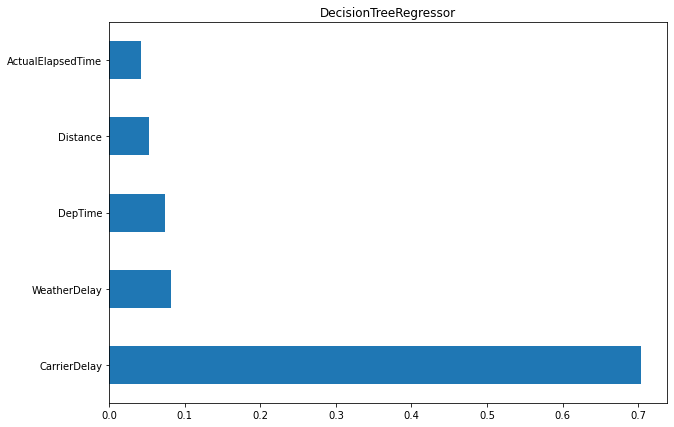

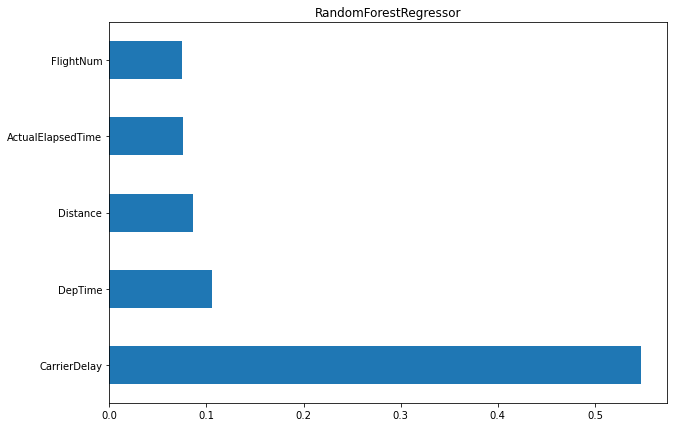

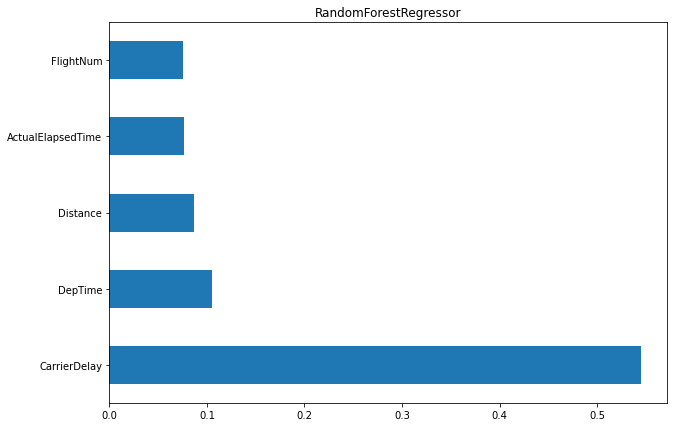

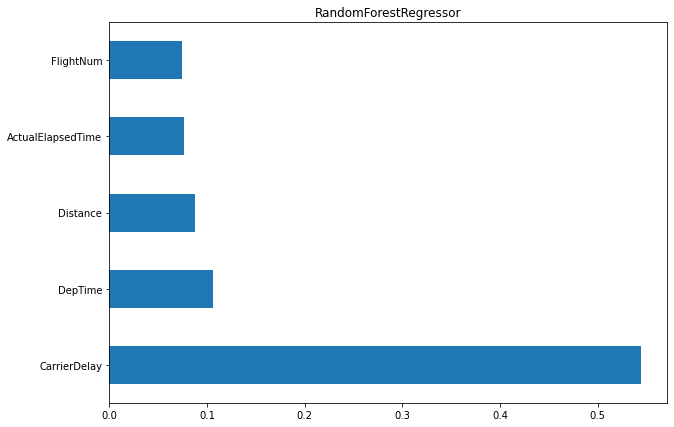

In [200]:
UseCaseModelizacion (df_2_sample, X1_train, y1_train, X1_test, y1_test )

In [201]:
# Conclusió: observem que en el cas de voler predir l'enderreriment dels vols, la selecció d'atributs no és una bona estratègia. Com més atributs treiem, més incrementen el MAE, MSE i l'RMSE. 
# Per altra banda el fet d'afegir les variables categòriques (que inicialment haviem descartat) mitjançant un Label Encoder, tampoc ajuda a millorar les mètriques. 
# En canvi, el procés d'estanderització sí que ha fet augmentar la precisió de les prediccions.

# Nivell 3
## Exercici 6
### No utilitzis la variable DepDelay a l’hora de fer prediccions

In [259]:
# No utilitzis la variable DepDelay a l’hora de fer prediccions: 
# Como no podemos utilizar la variable DepDelay, vamos a realizar un sumatorio de las variables donde se describe el motivo 
# de los retrasos (LateAircraftDelay, CarrierDelay, NASDelay, SecurityDelay y WeatherDelay), expresadas también en minutos, 
# para intentar predecir el retraso, ArrDelay, en cada caso. 

suma = df_sample["LateAircraftDelay"] + df_sample["CarrierDelay"] + df_sample["NASDelay"] + df_sample["SecurityDelay"] + df_sample["WeatherDelay"]

data = pd.DataFrame()
data["Delay"] = suma
#data[forecast_col]= df_sample[forecast_col]

X1 = np.array(data) # variables independientes (la suma de retrasos provocados por diversos motivos)
y1 = df_sample[forecast_col] #variable dependiente (retraso en la llegada)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [249]:
print("Shape X1_train    a         :", X1_train.shape)
print("Shape X1_test     a         :", X1_test.shape)
print("Shape y1_train    a         :", y1_train.shape)
print("Shape y1_test     a         :", y1_test.shape)
print("Shape X1          a         :", X1.shape)
print("Shape y1          a         :", y1.shape)
print("Shape X           a         :", X.shape)
print("Shape y           a         :", y.shape)
print("Shape df_1        a         :", df_1.shape)
print("Shape df_sample   a         :", df_sample.shape)
print("Shape df_2_sample a         :", df_2_sample.shape)
print("Shape data        a         :", data.shape)
print("Shape data2       a         :", data2.shape)

Shape X1_train    a         : (80000, 1)
Shape X1_test     a         : (20000, 1)
Shape y1_train    a         : (80000,)
Shape y1_test     a         : (20000,)
Shape X1          a         : (100000, 1)
Shape y1          a         : (100000,)
Shape X           a         : (100000, 27)
Shape y           a         : (100000,)
Shape df_1        a         : (1936758, 28)
Shape df_sample   a         : (100000, 28)
Shape df_2_sample a         : (100000, 10)
Shape data        a         : (100000, 1)
Shape data2       a         : (100000,)


In [260]:
UseCaseModelizacion_vDecisionTree (df_sample, X1_train, y1_train, X1_test, y1_test )

########### 1. MODELO DE REGRESIÓN LINEAL SIMPLE ############:


1.1. LinearRegression                                          :
- Normalize     = False 
- Fit_intercept = True  
El coeficiente de determinación del train es: 0.9893013377860914
El coeficiente de determinación del test  es: 0.9893943803630569
intercept                         : -4.304633424848376
Mean Absolute Error               : 4.126123213637258
Mean Squared Error                : 34.772377184375806
Root Mean Squared Error           : 5.896810763826139
Duration: 0.01874610000231769 sec
-----------------------------------------------------------
1.2. LinearRegression                                          :
- Normalize     = False 
- Fit_intercept = False 
El coeficiente de determinación del train es: 0.9859305219692496
El coeficiente de determinación del test  es: 0.9859221769783599
intercept                         : 0.0
Mean Absolute Error               : 3.3764057845460353
Mean Squared Error                : 46